## Access, preprocess, analyse and visualize satellite images in Google Colab with Python

In [ ]:
!pip install sentinelsat rasterio folium
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install cartopy
!pip install metpy
!pip install opencv-python
!pip install GDAL
!apt-get install -y python3-gdal
!pip install rasterio
!pip install remotior_sensus
!pip install rasterio numpy
!pip install openeo


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for html2text: filename=html2text-2024.2.26-py3-none-any.whl size=33111 sha256=a876678ece6f6c7669ddaf762a5c8b5ac4e656d130f8a65c880183d1a9f2c3b7
  Stored in directory: /root/.cache/pip/wheels/f3/96/6d/a7eba8f80d31cbd188a2787b81514d82fc5ae6943c44777659
Successfully built html2text
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-myvh6qyj
  Running command git clone --filter=blob:none --quiet git://github.com/geopandas/geopandas.git /tmp/pip-req-build-myvh6qyj
  fatal: unable to connect to github.com:
  github.com[0: 140.82.113.3]: errno=Connection timed out

  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet git://github.com/geopandas/geopan

In [ ]:
import folium
import os
import numpy as np

from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import MultiPolygon, Polygon
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
import fiona

import pandas as pd # for data manpulation
import xml.etree.ElementTree as ET

from PIL import Image # library for image processing tasks in Python.
import cv2 #OpenCV is a computer vision library
import subprocess
import xarray as xr  # a library designed for working with labeled multi-dimensional arrays
# Any import of metpy will activate the accessors
from metpy.cbook import get_test_data


In [ ]:
import remotior_sensus
rs = remotior_sensus.Session(n_processes=2, available_ram=10240)

## Connection of Api To copernicus dataspace

## Method of How to query CDSE Catalogue and download products

##Import necessary Python modules

In [ ]:
# HTTP requests
import requests

# JSON parser
import json

# XML parser
import xml.etree.ElementTree as ET

# system modules
import os
import re
import sys
import random

# data manipulation
import pandas as pd
import numpy as np

# image manipulation
import rasterio
import matplotlib.pyplot as plt
import matplotlib.image
from rasterio.windows import Window

# file manipulation
from pathlib import Path
import json


import scipy.signal
import openeo

#### Query the catalogue and get a list of products matching the search parameters
Refer to https://documentation.dataspace.copernicus.eu/APIs/OData.html#query-collection-of-products

In [ ]:
# base URL of the product catalogue
catalogue_odata_url = "https://catalogue.dataspace.copernicus.eu/odata/v1"

# search parameters
collection_name = "SENTINEL-2"
product_type = "S2MSI1C"
max_cloud_cover = 0
aoi = "POLYGON ((32.12689208984375 31.0977783203125, 32.17681884765625 31.06915283203125, 32.18475341796875 31.03765869140625, 32.208740234375 30.9371337890625, 32.20367431640625 30.93450927734375, 32.181365966796875 30.921539306640625, 32.17816162109375 30.89752197265625, 32.16253662109375 30.73321533203125, 32.15948486328125 30.6815185546875, 32.15924072265625 30.677978515625, 32.17486572265625 30.6258544921875, 32.11962890625 30.60650634765625, 32.10906982421875 30.595947265625, 32.1278076171875 30.56268310546875, 32.07037353515625 30.5548095703125, 32.0655517578125 30.5633544921875, 32.00830078125 30.571044921875, 31.97662353515625 30.575439453125, 31.865966796875 30.555419921875, 31.7716064453125 30.5732421875, 31.752685546875 30.55810546875, 31.75689697265625 30.52593994140625, 31.76568603515625 30.51824951171875, 31.808563232421875 30.52398681640625, 31.82196044921875 30.49493408203125, 31.79864501953125 30.482177734375, 31.79888916015625 30.4742431640625, 31.83978271484375 30.27166748046875, 31.86102294921875 30.18780517578125, 31.59185791015625 30.197509765625, 31.56658935546875 30.2406005859375, 31.55621337890625 30.2578125, 31.53271484375 30.27032470703125, 31.38970947265625 30.28790283203125, 31.384670192531544 30.292616379220142, 31.372772216796875 30.30377197265625, 31.3734130859375 30.32379150390625, 31.34130859375 30.34136962890625, 31.34283447265625 30.3568115234375, 31.35406494140625 30.357421875, 31.3531494140625 30.36907958984375, 31.34326171875 30.3724365234375, 31.3468017578125 30.38165283203125, 31.33245849609375 30.39044189453125, 31.33203125 30.399658203125, 31.31048583984375 30.41046142578125, 31.29705810546875 30.42852783203125, 31.305419921875 30.43597412109375, 31.267578125 30.45556640625, 31.27484130859375 30.466552734375, 31.26934814453125 30.49365234375, 31.29046630859375 30.52069091796875, 31.28851318359375 30.54071044921875, 31.3021240234375 30.5455322265625, 31.2957763671875 30.5701904296875, 31.3089599609375 30.5770263671875, 31.3287353515625 30.57171630859375, 31.34698486328125 30.59814453125, 31.34173583984375 30.6080322265625, 31.34527587890625 30.6214599609375, 31.38751220703125 30.62298583984375, 31.372314453125 30.6636962890625, 31.39031982421875 30.67205810546875, 31.38330078125 30.6845703125, 31.38311767578125 30.70440673828125, 31.37384033203125 30.7103271484375, 31.379150390625 30.71295166015625, 31.38311767578125 30.7147216796875, 31.36920166015625 30.73736572265625, 31.37408447265625 30.7459716796875, 31.3646240234375 30.7470703125, 31.36639404296875 30.74993896484375, 31.37188720703125 30.75982666015625, 31.36749267578125 30.77191162109375, 31.36395263671875 30.78094482421875, 31.3731689453125 30.784912109375, 31.378203714656088 30.804911332045364, 31.3798828125 30.811431884765625, 31.40484619140625 30.81195068359375, 31.41278076171875 30.802734375, 31.4315185546875 30.811279296875, 31.43280029296875 30.81793212890625, 31.4332275390625 30.82073974609375, 31.4625244140625 30.82537841796875, 31.48516845703125 30.81109619140625, 31.525634765625 30.82342529296875, 31.5733642578125 30.81414794921875, 31.5936279296875 30.82122802734375, 31.59539794921875 30.84014892578125, 31.6328125 30.849365234375, 31.63848876953125 30.86541748046875, 31.6424560546875 30.87689208984375, 31.61761474609375 30.90130615234375, 31.62640380859375 30.92132568359375, 31.66778564453125 30.9208984375, 31.6893310546875 30.9404296875, 31.68621826171875 30.97100830078125, 31.71441650390625 30.99609375, 31.73663330078125 31.01593017578125, 31.745849609375 31.04229736328125, 31.779296875 31.0654296875, 31.78240966796875 31.06585693359375, 31.80548095703125 31.06890869140625, 31.837158203125 31.07598876953125, 31.85540771484375 31.07110595703125, 31.8870849609375 31.0775146484375, 31.9429931640625 31.0885009765625, 31.97271728515625 31.11053466796875, 32.05120849609375 31.11383056640625, 32.12689208984375 31.0977783203125))"

search_period_start = "2022-05-10T00:00:00.000Z"
search_period_end = "2023-11-15T00:00:00.000Z"


#### Build and check the search query

In [ ]:
search_query = f"{catalogue_odata_url}/Products?$filter=Collection/Name eq '{collection_name}' and Attributes/OData.CSC.StringAttribute/any(att:att/Name eq 'productType' and att/OData.CSC.StringAttribute/Value eq '{product_type}') and OData.CSC.Intersects(area=geography'SRID=4326;{aoi}') and ContentDate/Start gt {search_period_start} and ContentDate/Start lt {search_period_end}"

print(f"""\n{search_query.replace(' ', "%20")}\n""")


https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name%20eq%20'SENTINEL-2'%20and%20Attributes/OData.CSC.StringAttribute/any(att:att/Name%20eq%20'productType'%20and%20att/OData.CSC.StringAttribute/Value%20eq%20'S2MSI1C')%20and%20OData.CSC.Intersects(area=geography'SRID=4326;POLYGON%20((32.12689208984375%2031.0977783203125,%2032.17681884765625%2031.06915283203125,%2032.18475341796875%2031.03765869140625,%2032.208740234375%2030.9371337890625,%2032.20367431640625%2030.93450927734375,%2032.181365966796875%2030.921539306640625,%2032.17816162109375%2030.89752197265625,%2032.16253662109375%2030.73321533203125,%2032.15948486328125%2030.6815185546875,%2032.15924072265625%2030.677978515625,%2032.17486572265625%2030.6258544921875,%2032.11962890625%2030.60650634765625,%2032.10906982421875%2030.595947265625,%2032.1278076171875%2030.56268310546875,%2032.07037353515625%2030.5548095703125,%2032.0655517578125%2030.5633544921875,%2032.00830078125%2030.571044921875,%2031.9766

In [ ]:
from urllib.parse import quote
import requests

encoded_search_query = quote(search_query, safe='/:?=&')

# Print the encoded search query for inspection
print("Encoded URL:", encoded_search_query)

# Run the query and get the response
response = requests.get(encoded_search_query)

# Check if the request was successful
if response.status_code == 200:
    print(response.json())
else:
    print(f"Failed to retrieve data, status code: {response.status_code}")
    print("Response content:", response.text)  # This line will print the error message from the server


Encoded URL: https://catalogue.dataspace.copernicus.eu/odata/v1/Products?%24filter=Collection/Name%20eq%20%27SENTINEL-2%27%20and%20Attributes/OData.CSC.StringAttribute/any%28att:att/Name%20eq%20%27productType%27%20and%20att/OData.CSC.StringAttribute/Value%20eq%20%27S2MSI1C%27%29%20and%20OData.CSC.Intersects%28area=geography%27SRID=4326%3BPOLYGON%20%28%2832.12689208984375%2031.0977783203125%2C%2032.17681884765625%2031.06915283203125%2C%2032.18475341796875%2031.03765869140625%2C%2032.208740234375%2030.9371337890625%2C%2032.20367431640625%2030.93450927734375%2C%2032.181365966796875%2030.921539306640625%2C%2032.17816162109375%2030.89752197265625%2C%2032.16253662109375%2030.73321533203125%2C%2032.15948486328125%2030.6815185546875%2C%2032.15924072265625%2030.677978515625%2C%2032.17486572265625%2030.6258544921875%2C%2032.11962890625%2030.60650634765625%2C%2032.10906982421875%2030.595947265625%2C%2032.1278076171875%2030.56268310546875%2C%2032.07037353515625%2030.5548095703125%2C%2032.065551757

#### Run the query and display the results

In [ ]:
response = requests.get(search_query).json()
result = pd.DataFrame.from_dict(response["value"])


result.head()

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint
0,application/octet-stream,2e2bf049-8549-4b32-9cea-d90a4811edb7,S2B_MSIL1C_20230727T082609_N0509_R021_T36RVV_2...,application/octet-stream,747389397,2023-07-27T13:23:00.969Z,2023-07-27T13:36:26.253Z,2023-07-27T13:36:38.917Z,True,,/eodata/Sentinel-2/MSI/L1C/2023/07/27/S2B_MSIL...,"[{'Value': '85823d5e20b9ee7865a01964ad565381',...","{'Start': '2023-07-27T08:26:09.024Z', 'End': '...",geography'SRID=4326;POLYGON ((31.9451030140255...,"{'type': 'Polygon', 'coordinates': [[[31.94510..."
1,application/octet-stream,53495ca1-86df-4096-a321-16176ca90725,S2B_MSIL1C_20230727T082609_N0509_R021_T36RVU_2...,application/octet-stream,818876893,2023-07-27T12:49:31.191Z,2023-07-27T12:55:56.499Z,2023-07-27T12:56:09.892Z,True,,/eodata/Sentinel-2/MSI/L1C/2023/07/27/S2B_MSIL...,"[{'Value': '102176aa24b9813b74d14a2b5d1616ba',...","{'Start': '2023-07-27T08:26:09.024Z', 'End': '...",geography'SRID=4326;POLYGON ((31.955061120365 ...,"{'type': 'Polygon', 'coordinates': [[[31.95506..."
2,application/octet-stream,d7503ac1-3434-4d98-8831-215887752bd2,S2B_MSIL1C_20230727T082609_N0509_R021_T36RUV_2...,application/octet-stream,828074331,2023-07-27T12:51:50.809Z,2023-07-27T12:57:41.357Z,2023-07-27T12:57:53.011Z,True,,/eodata/Sentinel-2/MSI/L1C/2023/07/27/S2B_MSIL...,"[{'Value': '44db7ad6273e572528793258de08332a',...","{'Start': '2023-07-27T08:26:09.024Z', 'End': '...",geography'SRID=4326;POLYGON ((30.8915059675555...,"{'type': 'Polygon', 'coordinates': [[[30.89150..."
3,application/octet-stream,cd869322-5839-40e0-894b-c4ba8d87844b,S2B_MSIL1C_20230727T082609_N0509_R021_T36RUU_2...,application/octet-stream,856945027,2023-07-27T13:29:41.324Z,2023-07-27T13:36:26.787Z,2023-07-27T13:36:39.870Z,True,,/eodata/Sentinel-2/MSI/L1C/2023/07/27/S2B_MSIL...,"[{'Value': 'df38cffd21e07cba83cf96fafc89f922',...","{'Start': '2023-07-27T08:26:09.024Z', 'End': '...",geography'SRID=4326;POLYGON ((30.9113966287438...,"{'type': 'Polygon', 'coordinates': [[[30.91139..."
4,application/octet-stream,fb6b6ed2-3d49-4da8-a2ac-932834325df0,S2A_MSIL1C_20230702T082611_N0509_R021_T36RUV_2...,application/octet-stream,843796922,2023-07-02T14:07:30.336Z,2023-07-02T14:15:49.051Z,2023-07-02T14:16:02.741Z,True,,/eodata/Sentinel-2/MSI/L1C/2023/07/02/S2A_MSIL...,"[{'Value': '6ce6378dd69e4c6e84c8fca561cc77f2',...","{'Start': '2023-07-02T08:26:11.024Z', 'End': '...",geography'SRID=4326;POLYGON ((30.8915059675555...,"{'type': 'Polygon', 'coordinates': [[[30.89150..."


#### Add filtering by cloud coverage and repeat the query

In [ ]:
search_query = f"{search_query} and Attributes/OData.CSC.DoubleAttribute/any(att:att/Name eq 'cloudCover' and att/OData.CSC.DoubleAttribute/Value le {max_cloud_cover})"
print(f"""\n{search_query.replace(' ', "%20")}\n""")

response = requests.get(search_query).json()
result = pd.DataFrame.from_dict(response["value"])


result



https://catalogue.dataspace.copernicus.eu/odata/v1/Products?$filter=Collection/Name%20eq%20'SENTINEL-2'%20and%20Attributes/OData.CSC.StringAttribute/any(att:att/Name%20eq%20'productType'%20and%20att/OData.CSC.StringAttribute/Value%20eq%20'S2MSI1C')%20and%20OData.CSC.Intersects(area=geography'SRID=4326;POLYGON%20((32.12689208984375%2031.0977783203125,%2032.17681884765625%2031.06915283203125,%2032.18475341796875%2031.03765869140625,%2032.208740234375%2030.9371337890625,%2032.20367431640625%2030.93450927734375,%2032.181365966796875%2030.921539306640625,%2032.17816162109375%2030.89752197265625,%2032.16253662109375%2030.73321533203125,%2032.15948486328125%2030.6815185546875,%2032.15924072265625%2030.677978515625,%2032.17486572265625%2030.6258544921875,%2032.11962890625%2030.60650634765625,%2032.10906982421875%2030.595947265625,%2032.1278076171875%2030.56268310546875,%2032.07037353515625%2030.5548095703125,%2032.0655517578125%2030.5633544921875,%2032.00830078125%2030.571044921875,%2031.9766

,@odata.mediaContentType,Id,Name,ContentType,ContentLength,OriginDate,PublicationDate,ModificationDate,Online,EvictionDate,S3Path,Checksum,ContentDate,Footprint,GeoFootprint
0,application/octet-stream,16f533d4-399e-5475-8f37-4b8e7bee2c18,S2A_MSIL1C_20221015T082921_N0400_R021_T36RVV_2...,application/octet-stream,723530216,2022-10-15T10:29:03.211Z,2022-10-15T12:30:26.549Z,2022-10-15T12:30:31.868Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/10/15/S2A_MSIL...,[{}],"{'Start': '2022-10-15T08:29:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((31.9451030140255...,"{'type': 'Polygon', 'coordinates': [[[31.94510..."
1,application/octet-stream,10cc5471-17df-527a-9f1b-e2d725249a38,S2A_MSIL1C_20221015T082921_N0400_R021_T36RUU_2...,application/octet-stream,858201757,2022-10-15T10:34:28.471Z,2022-10-15T12:35:13.478Z,2022-10-15T12:35:21.135Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/10/15/S2A_MSIL...,[{}],"{'Start': '2022-10-15T08:29:21.024Z', 'End': '...",geography'SRID=4326;POLYGON ((30.9113966287438...,"{'type': 'Polygon', 'coordinates': [[[30.91139..."
2,application/octet-stream,4f1cdee5-7cae-5e9f-9841-c037add68659,S2B_MSIL1C_20221129T083219_N0400_R021_T36RVV_2...,application/octet-stream,744245423,2022-11-29T10:34:17.472Z,2022-11-29T11:51:04.204Z,2024-01-30T20:41:04.825Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/11/29/S2B_MSIL...,"[{'Value': 'ef87d075e308e73cfb4e324650c669da',...","{'Start': '2022-11-29T08:32:19.024Z', 'End': '...",geography'SRID=4326;POLYGON ((31.9451030140255...,"{'type': 'Polygon', 'coordinates': [[[31.94510..."
3,application/octet-stream,dc9e3dad-6ee4-5558-8f9a-53ac270a2076,S2B_MSIL1C_20221129T083219_N0400_R021_T36RUV_2...,application/octet-stream,833214063,2022-11-29T10:45:01.179Z,2022-11-29T11:55:20.208Z,2024-01-30T20:37:43.831Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/11/29/S2B_MSIL...,"[{'Value': 'e833cd59d38779d2916046bd12af5233',...","{'Start': '2022-11-29T08:32:19.024Z', 'End': '...",geography'SRID=4326;POLYGON ((30.8915059675555...,"{'type': 'Polygon', 'coordinates': [[[30.89150..."
4,application/octet-stream,d8e4ad52-ecbe-509f-8a37-dd70b0ed04ca,S2B_MSIL1C_20221229T083249_N0509_R021_T36RVU_2...,application/octet-stream,863326740,2022-12-29T11:17:03.110Z,2022-12-29T12:19:47.085Z,2023-11-29T14:20:54.562Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/12/29/S2B_MSIL...,"[{'Value': '342263c4a4106af33de649332c087cf7',...","{'Start': '2022-12-29T08:32:49.024Z', 'End': '...",geography'SRID=4326;POLYGON ((31.955061120365 ...,"{'type': 'Polygon', 'coordinates': [[[31.95506..."
5,application/octet-stream,38b47d26-f197-506a-9e7a-9d09af4c9a18,S2B_MSIL1C_20221119T083139_N0509_R021_T36RUU_2...,application/octet-stream,881513901,2023-01-10T16:49:48.474Z,2023-01-10T17:50:43.219Z,2023-11-29T14:11:46.090Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/11/19/S2B_MSIL...,"[{'Value': '4563674da3c4f872df38da8a0aa405a5',...","{'Start': '2022-11-19T08:31:39.024Z', 'End': '...",geography'SRID=4326;POLYGON ((30.9113966287438...,"{'type': 'Polygon', 'coordinates': [[[30.91139..."
6,application/octet-stream,f475fd79-0ea1-5d93-9ffb-aa884642d34e,S2B_MSIL1C_20221119T083139_N0509_R021_T36RVV_2...,application/octet-stream,736304484,2023-01-10T16:54:46.045Z,2023-01-10T18:03:06.547Z,2023-11-29T14:11:37.549Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/11/19/S2B_MSIL...,"[{'Value': 'd459690d5c572bd2acbc2542c37a74ee',...","{'Start': '2022-11-19T08:31:39.024Z', 'End': '...",geography'SRID=4326;POLYGON ((31.9451030140255...,"{'type': 'Polygon', 'coordinates': [[[31.94510..."
7,application/octet-stream,0be9ce8a-5d29-5087-b11c-490c90c2f0fc,S2B_MSIL1C_20221119T083139_N0509_R021_T36RUV_2...,application/octet-stream,829575544,2023-01-10T16:25:50.098Z,2023-01-10T17:27:18.957Z,2023-11-29T14:12:11.918Z,True,,/eodata/Sentinel-2/MSI/L1C/2022/11/19/S2B_MSIL...,"[{'Value': '2e5d23f500fcc5246268fec6f46bef8c',...","{'Start': '2022-11-19T08:31:39.024Z', 'End': '...",geography'SRID=4326;POLYGON ((30.8915059675555...,"{'type': 'Polygon', 'coordinates': [[[30.89150..."
8,application/octet-stream,f843b

In [ ]:
result.columns

Index(['@odata.mediaContentType', 'Id', 'Name', 'ContentType', 'ContentLength',
       'OriginDate', 'PublicationDate', 'ModificationDate', 'Online',
       'EvictionDate', 'S3Path', 'Checksum', 'ContentDate', 'Footprint',
       'GeoFootprint'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming 'result' is your DataFrame
# result = pd.read_json('your_json_file.json') # Uncomment this if you need to read from a JSON file

# Get the number of rows and columns
num_rows, num_columns = result.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 20
Number of columns: 15


In [ ]:

import os

os.environ["CDSE_USERNAME"] = "CDSE_USERNAME"
os.environ["CDSE_PASSWORD"] = "CDSE_PASSWORD"

# Get authentication token
import requests
import json

auth_server_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
data = {
    "client_id": "cdse-public",
    "grant_type": "password",
    "username": os.environ["CDSE_USERNAME"],
    "password": os.environ["CDSE_PASSWORD"],
}

response = requests.post(auth_server_url, data=data, verify=True, allow_redirects=False)
access_token = json.loads(response.text)["access_token"]

# Now you can use the 'access_token' for further requests
print("Authentication token:", access_token)


Authentication token: eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJYVUh3VWZKaHVDVWo0X3k4ZF8xM0hxWXBYMFdwdDd2anhob2FPLUxzREZFIn0.eyJleHAiOjE3MTU5NTI3NTYsImlhdCI6MTcxNTk1MjE1NiwianRpIjoiMGIxOTZmMDgtMDRlMC00Y2MwLTk5ZTAtNDY3MzA4NmZjYWViIiwiaXNzIjoiaHR0cHM6Ly9pZGVudGl0eS5kYXRhc3BhY2UuY29wZXJuaWN1cy5ldS9hdXRoL3JlYWxtcy9DRFNFIiwiYXVkIjpbIkNMT1VERkVSUk9fUFVCTElDIiwiYWNjb3VudCJdLCJzdWIiOiI2NmJiMjkzZS01NmE1LTQxZTMtYmQzNi1lMmYxZWI3ZGQ2MTkiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJjZHNlLXB1YmxpYyIsInNlc3Npb25fc3RhdGUiOiI4NTE3MjZhNy05NGVjLTRlYzQtYjI4NC01MzdiYWJhNGU4MTgiLCJhbGxvd2VkLW9yaWdpbnMiOlsiaHR0cHM6Ly9sb2NhbGhvc3Q6NDIwMCIsIioiLCJodHRwczovL3dvcmtzcGFjZS5zdGFnaW5nLWNkc2UtZGF0YS1leHBsb3Jlci5hcHBzLnN0YWdpbmcuaW50cmEuY2xvdWRmZXJyby5jb20iXSwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwidW1hX2F1dGhvcml6YXRpb24iLCJkZWZhdWx0LXJvbGVzLWNkYXMiLCJjb3Blcm5pY3VzLWdlbmVyYWwiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50IiwibWFuYWdlLWFjY291bnQtbGlua3MiLCJ2aWV3LXByb2ZpbGUiXX

In [ ]:
# Select identifier of the first product
product_identifier = result.iloc[0, 1]
product_name = result.iloc[0, 2]

# Establish session
session = requests.Session()
session.headers["Authorization"] = f"Bearer {access_token}"

##Get manifest file

In [ ]:
# Nodes() method lets us traverse the directory tree and retrieve single file from the product
url = f"{catalogue_odata_url}/Products({product_identifier})/Nodes({product_name})/Nodes(MTD_MSIL1C.xml)/$value"
response = session.get(url, allow_redirects=False)
while response.status_code in (301, 302, 303, 307):
    url = response.headers["Location"]
    response = session.get(url, allow_redirects=False)

file = session.get(url, verify=False, allow_redirects=True)

# Save the product in home directory
outfile = Path.home() / "MTD_MSIL1C.xml"
outfile.write_bytes(file.content)

45997

In [ ]:
# Pass the path of the xml document
tree = ET.parse(str(outfile))
# get the parent tag
root = tree.getroot()

# Get the location of individual bands in Sentinel-2 granule
band_location = []
band_location.append(f"{product_name}/{root[0][0][12][0][0][1].text}.jp2".split("/"))
band_location.append(f"{product_name}/{root[0][0][12][0][0][2].text}.jp2".split("/"))
band_location.append(f"{product_name}/{root[0][0][12][0][0][3].text}.jp2".split("/"))


##Download bands

In [ ]:
# Build the url for each file using Nodes() method
bands = []
for band_file in band_location:
    url = f"{catalogue_odata_url}/Products({product_identifier})/Nodes({product_name})/Nodes({band_file[1]})/Nodes({band_file[2]})/Nodes({band_file[3]})/Nodes({band_file[4]})/$value"
    response = session.get(url, allow_redirects=False)
    while response.status_code in (301, 302, 303, 307):
        url = response.headers["Location"]
        response = session.get(url, allow_redirects=False)
    file = session.get(url, verify=False, allow_redirects=True)
    # Save the product in home directory
    outfile = Path.home() / band_file[4]
    outfile.write_bytes(file.content)
    bands.append(str(outfile))
    print("Saved:", band_file[4])

Saved: T36RVV_20221015T082921_B02.jp2
Saved: T36RVV_20221015T082921_B03.jp2
Saved: T36RVV_20221015T082921_B04.jp2


In [ ]:
import rasterio
from rasterio.errors import RasterioIOError

# Define the file path
file_path = str(outfile)

try:
    # Open the file
    with rasterio.open(file_path) as dataset:
        # Get the number of rows and columns
        num_rows = dataset.height
        num_cols = dataset.width

        # Get the pixel values
        data = dataset.read(1)

    # Print information about the pixels
    print("Number of rows:", num_rows)
    print("Number of columns:", num_cols)
    print("Minimum pixel value:", data.min())
    print("Maximum pixel value:", data.max())
    print("Data type:", data.dtype)

except RasterioIOError as e:
    print(f"RasterioIOError: {e}")
    print("Ensure that the file format is supported by rasterio and that the file path is correct.")
    print("You may need to install additional dependencies for specific file formats.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Number of rows: 10980
Number of columns: 10980
Minimum pixel value: 1298
Maximum pixel value: 7554
Data type: uint16


##Prepare cropped patch


In [ ]:
%matplotlib inline

# Crop the images to random 1000x1000 patch
xsize, ysize = 1000, 1000
xoff, yoff, xmax, ymax = 0, 0, 0, 0
n = 2

for band_file in bands:
    full_band = rasterio.open(band_file, driver="JP2OpenJPEG")
    if xmax == 0:
        xmin, xmax = 0, full_band.width - xsize
    if ymax == 0:
        ymin, ymax = 0, full_band.height - ysize
    if xoff == 0:
        xoff, yoff = random.randint(xmin, xmax), random.randint(ymin, ymax)
    window = Window(xoff, yoff, xsize, ysize)
    transform = full_band.window_transform(window)
    profile = full_band.profile
    crs = full_band.crs
    profile.update({"height": xsize, "width": ysize, "transform": transform})
    with rasterio.open(
        f"{Path.home()}/patch_band_{n}.jp2", "w", **profile
    ) as patch_band:
        # Read the data from the window and write it to the output raster
        patch_band.write(full_band.read(window=window))
    print(f"Patch for band {n} created")
    n += 1

Patch for band 2 created


Patch for band 3 created


Patch for band 4 created


##Generate true colour


Saved as: /root/T36RVV_20221015T082921_B04.jp2


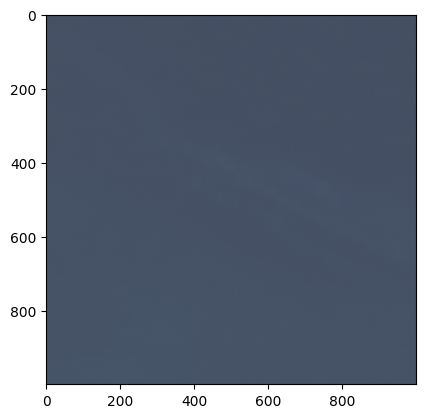

In [ ]:
# Read the patch files
band2 = rasterio.open(f"{Path.home()}/patch_band_2.jp2", driver="JP2OpenJPEG")  # blue
band3 = rasterio.open(f"{Path.home()}/patch_band_3.jp2", driver="JP2OpenJPEG")  # green
band4 = rasterio.open(f"{Path.home()}/patch_band_4.jp2", driver="JP2OpenJPEG")  # red

red = band4.read(1)
green = band3.read(1)
blue = band2.read(1)

# Normalize the pixel values and apply gain
gain = 2
red_n = np.clip(red * gain / 10000, 0, 1)
green_n = np.clip(green * gain / 10000, 0, 1)
blue_n = np.clip(blue * gain / 10000, 0, 1)

# Create composite image
rgb_composite_n = np.dstack((red_n, green_n, blue_n))

# Display image
plt.imshow(rgb_composite_n)

# Save image to file
matplotlib.image.imsave(f"{Path.home()}/Sentinel2_true_color.jpeg", rgb_composite_n)
print("Saved as:", outfile)

In [ ]:
# # Print minimum and maximum values of normalized bands
print("Red band - min:", red_n.min(), "max:", red_n.max())
print("Green band - min:", green_n.min(), "max:", green_n.max())
print("Blue band - min:", blue_n.min(), "max:", blue_n.max())

print("Composite image array:", rgb_composite_n)



print("Red band count:", band4.count)
print("Green band count:", band3.count)
print("Blue band count:", band2.count)


Red band - min: 0.2652 max: 0.3552
Green band - min: 0.305 max: 0.4124
Blue band - min: 0.3808 max: 0.4886
Composite image array: [[[0.2758 0.3148 0.3922]
  [0.279  0.317  0.394 ]
  [0.275  0.3168 0.394 ]
  ...
  [0.2712 0.3134 0.3884]
  [0.2724 0.313  0.3914]
  [0.2754 0.3142 0.3934]]

 [[0.2766 0.319  0.3968]
  [0.2738 0.3186 0.3964]
  [0.2726 0.317  0.393 ]
  ...
  [0.273  0.3124 0.3874]
  [0.2738 0.3116 0.3896]
  [0.274  0.313  0.392 ]]

 [[0.2752 0.3158 0.3924]
  [0.2728 0.3144 0.3952]
  [0.2708 0.3156 0.3918]
  ...
  [0.2712 0.3122 0.3884]
  [0.275  0.3102 0.3906]
  [0.2734 0.3116 0.3912]]

 ...

 [[0.2782 0.3338 0.4098]
  [0.2812 0.3356 0.4122]
  [0.2784 0.3376 0.4124]
  ...
  [0.2744 0.322  0.4052]
  [0.2756 0.3204 0.4066]
  [0.2744 0.3214 0.4028]]

 [[0.279  0.334  0.4104]
  [0.2786 0.3344 0.411 ]
  [0.2746 0.3304 0.4108]
  ...
  [0.2732 0.3214 0.3998]
  [0.2738 0.321  0.4008]
  [0.2724 0.3234 0.4024]]

 [[0.2768 0.331  0.411 ]
  [0.2742 0.3304 0.4078]
  [0.2766 0.3306 0.4082]

In [ ]:
# Ensure correct assignment of bands to RGB channels
print("Red band:", red_n.shape)  # Check shape to verify red channel
print("Green band:", green_n.shape)  # Check shape to verify green channel
print("Blue band:", blue_n.shape)  # Check shape to verify blue channel


Red band: (1000, 1000)
Green band: (1000, 1000)
Blue band: (1000, 1000)


## Exploring Satellite Imagery with Rasterio

### Create RGB Image
The true colour of satellite images is often displayed in a combination of red, green and blue band. Let us first read the data with Rasterio and create an RGB image from Bands 4, 3, and 2

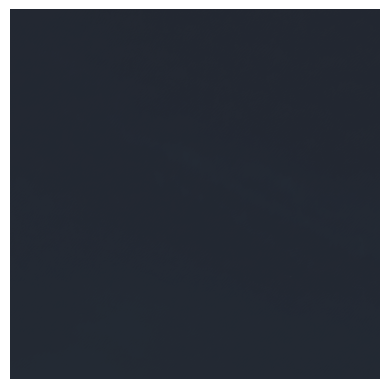

In [ ]:
import rasterio
import matplotlib.pyplot as plt


red_band_path = f"{Path.home()}/patch_band_4.jp2"
green_band_path = f"{Path.home()}/patch_band_3.jp2"
blue_band_path = f"{Path.home()}/patch_band_2.jp2"

# Open the raster bands
red_band = rasterio.open(red_band_path, driver="JP2OpenJPEG")
green_band = rasterio.open(green_band_path, driver="JP2OpenJPEG")
blue_band = rasterio.open(blue_band_path, driver="JP2OpenJPEG")

# Read band data
red = red_band.read(1)
green = green_band.read(1)
blue = blue_band.read(1)

# Normalize pixel values to the range [0, 1]
red_n = red / 10000.0
green_n = green / 10000.0
blue_n = blue / 10000.0

# Stack bands to create an RGB image
rgb_image = np.dstack((red_n, green_n, blue_n))

# Display the RGB image
plt.imshow(rgb_image)
plt.axis('off')  # Turn off axis labels
plt.show()


### Mask Satellite images

One important preprocessing task to clip or mask an area of study. Since this RGB image is large and huge you save both computing power and time to clip and use only the area of interest. We will clip the Natural reserve area from the RGB image

Raster CRS: EPSG:32636
Raster Bounds: BoundingBox(left=481330.0, bottom=3483880.0, right=491330.0, top=3493880.0)


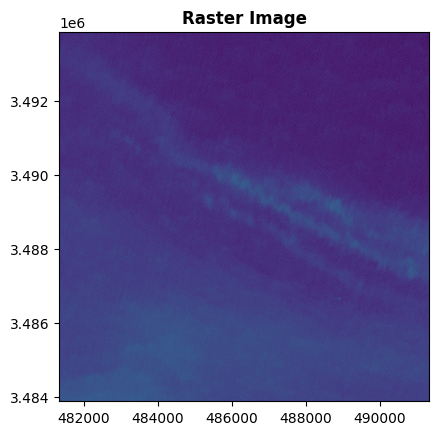

In [ ]:
import rasterio
from rasterio.plot import show

# Replace with your raster file path
raster_file_path = f"{Path.home()}/patch_band_2.jp2"

with rasterio.open(raster_file_path) as src:
    raster_crs = src.crs
    raster_bounds = src.bounds
    print("Raster CRS:", raster_crs)
    print("Raster Bounds:", raster_bounds)

    # Optionally, visualize the raster
    show(src, title="Raster Image")


## Preprocessing for Extract Feature  from bands

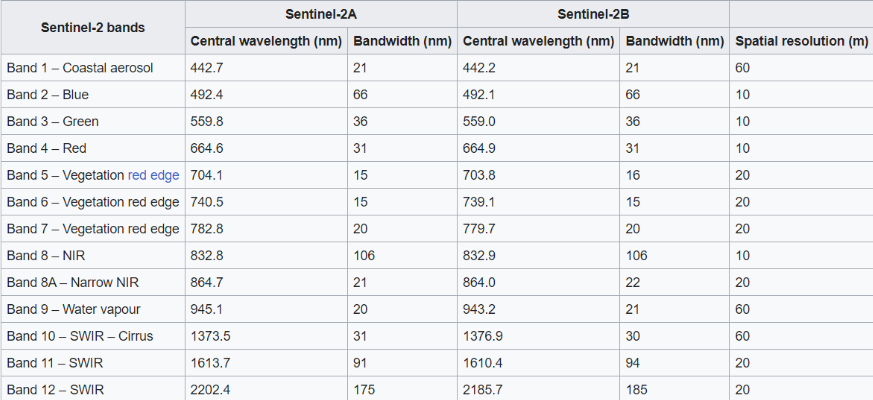

##Establish an authenticated connection to Copernicus Data Space Ecosystem openEO back-end.



In [ ]:
 connection = openeo.connect(url="openeo.dataspace.copernicus.eu")
 connection.authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=BMTT-DTTY 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

##Basic NDVI Timeseries
Calculating Normalized Difference Vegetation Index (NDVI) is an important indicator to assess the presence/absence of green vegetation from the satellite images. To calculate the NDVI, you need Red band and Near-Infrared Band (NIR). Different satellite images assign different numbers for this band. Sentinel Images have red in 4th band and NIR in the 8th band. The formula for NDVI calculation is:
nir - red /(nir + red).

To carry out this in Rasterio we need first to read the 4th and 8th bands as arrays. We also need to make sure that the arrays are floats.

##Load the “B04” (red) and “B08” (NIR) brands from the SENTINEL2_L2A collection for the desired time window for season of Rice for year (2020):

In [ ]:
# fields = json.loads(
#     """{
#     "type": "FeatureCollection",
#     "features": [
#        {"type": "Feature", "properties": {}, "geometry":{"type":"Polygon","coordinates":[[[32.12689208984375,31.0977783203125],[32.17681884765625,31.06915283203125],[32.18475341796875,31.03765869140625],[32.208740234375,30.9371337890625],[32.20367431640625,30.93450927734375],[32.181365966796875,30.921539306640625],[32.17816162109375,30.89752197265625],[32.16253662109375,30.73321533203125],[32.15948486328125,30.6815185546875],[32.15924072265625,30.677978515625],[32.17486572265625,30.6258544921875],[32.11962890625,30.60650634765625],[32.10906982421875,30.595947265625],[32.1278076171875,30.56268310546875],[32.07037353515625,30.5548095703125],[32.0655517578125,30.5633544921875],[32.00830078125,30.571044921875],[31.97662353515625,30.575439453125],[31.865966796875,30.555419921875],[31.7716064453125,30.5732421875],[31.752685546875,30.55810546875],[31.75689697265625,30.52593994140625],[31.76568603515625,30.51824951171875],[31.808563232421875,30.52398681640625],[31.82196044921875,30.49493408203125],[31.79864501953125,30.482177734375],[31.79888916015625,30.4742431640625],[31.83978271484375,30.27166748046875],[31.86102294921875,30.18780517578125],[31.59185791015625,30.197509765625],[31.56658935546875,30.2406005859375],[31.55621337890625,30.2578125],[31.53271484375,30.27032470703125],[31.38970947265625,30.28790283203125],[31.384670192531544,30.292616379220142],[31.372772216796875,30.30377197265625],[31.3734130859375,30.32379150390625],[31.34130859375,30.34136962890625],[31.34283447265625,30.3568115234375],[31.35406494140625,30.357421875],[31.3531494140625,30.36907958984375],[31.34326171875,30.3724365234375],[31.3468017578125,30.38165283203125],[31.33245849609375,30.39044189453125],[31.33203125,30.399658203125],[31.31048583984375,30.41046142578125],[31.29705810546875,30.42852783203125],[31.305419921875,30.43597412109375],[31.267578125,30.45556640625],[31.27484130859375,30.466552734375],[31.26934814453125,30.49365234375],[31.29046630859375,30.52069091796875],[31.28851318359375,30.54071044921875],[31.3021240234375,30.5455322265625],[31.2957763671875,30.5701904296875],[31.3089599609375,30.5770263671875],[31.3287353515625,30.57171630859375],[31.34698486328125,30.59814453125],[31.34173583984375,30.6080322265625],[31.34527587890625,30.6214599609375],[31.38751220703125,30.62298583984375],[31.372314453125,30.6636962890625],[31.39031982421875,30.67205810546875],[31.38330078125,30.6845703125],[31.38311767578125,30.70440673828125],[31.37384033203125,30.7103271484375],[31.379150390625,30.71295166015625],[31.38311767578125,30.7147216796875],[31.36920166015625,30.73736572265625],[31.37408447265625,30.7459716796875],[31.3646240234375,30.7470703125],[31.36639404296875,30.74993896484375],[31.37188720703125,30.75982666015625],[31.36749267578125,30.77191162109375],[31.36395263671875,30.78094482421875],[31.3731689453125,30.784912109375],[31.378203714656088,30.804911332045364],[31.3798828125,30.811431884765625],[31.40484619140625,30.81195068359375],[31.41278076171875,30.802734375],[31.4315185546875,30.811279296875],[31.43280029296875,30.81793212890625],[31.4332275390625,30.82073974609375],[31.4625244140625,30.82537841796875],[31.48516845703125,30.81109619140625],[31.525634765625,30.82342529296875],[31.5733642578125,30.81414794921875],[31.5936279296875,30.82122802734375],[31.59539794921875,30.84014892578125],[31.6328125,30.849365234375],[31.63848876953125,30.86541748046875],[31.6424560546875,30.87689208984375],[31.61761474609375,30.90130615234375],[31.62640380859375,30.92132568359375],[31.66778564453125,30.9208984375],[31.6893310546875,30.9404296875],[31.68621826171875,30.97100830078125],[31.71441650390625,30.99609375],[31.73663330078125,31.01593017578125],[31.745849609375,31.04229736328125],[31.779296875,31.0654296875],[31.78240966796875,31.06585693359375],[31.80548095703125,31.06890869140625],[31.837158203125,31.07598876953125],[31.85540771484375,31.07110595703125],[31.8870849609375,31.0775146484375],[31.9429931640625,31.0885009765625],[31.97271728515625,31.11053466796875],[32.05120849609375,31.11383056640625],[32.12689208984375,31.0977783203125]]]}}


#     ]}
# """
# )
fields = json.loads(
    """{
    "type": "FeatureCollection",
    "features": [
       {"type": "Feature", "properties": {}, "geometry":{"type":"Polygon","coordinates":[[[32.12689208984375,31.0977783203125],[32.17681884765625,31.06915283203125],[32.18475341796875,31.03765869140625],[32.208740234375,30.9371337890625],[32.20367431640625,30.93450927734375],[32.181365966796875,30.921539306640625],[32.17816162109375,30.89752197265625],[32.16253662109375,30.73321533203125],[32.15948486328125,30.6815185546875],[32.15924072265625,30.677978515625],[32.17486572265625,30.6258544921875],[32.11962890625,30.60650634765625],[32.10906982421875,30.595947265625],[32.1278076171875,30.56268310546875],[32.07037353515625,30.5548095703125],[32.0655517578125,30.5633544921875],[32.00830078125,30.571044921875],[31.97662353515625,30.575439453125],[31.865966796875,30.555419921875],[31.7716064453125,30.5732421875],[31.752685546875,30.55810546875],[31.75689697265625,30.52593994140625],[31.76568603515625,30.51824951171875],[31.3798828125,30.811431884765625],[31.40484619140625,30.81195068359375],[31.41278076171875,30.802734375],[31.4315185546875,30.811279296875],[31.43280029296875,30.81793212890625],[31.4332275390625,30.82073974609375],[31.4625244140625,30.82537841796875],[31.48516845703125,30.81109619140625]]]}}


    ]}
"""
)
#{"type":"Polygon","coordinates":[[[32.12689208984375,31.0977783203125],[32.17681884765625,31.06915283203125],[32.18475341796875,31.03765869140625],[32.208740234375,30.9371337890625],[32.20367431640625,30.93450927734375],[32.181365966796875,30.921539306640625],[32.17816162109375,30.89752197265625],[32.16253662109375,30.73321533203125],[32.15948486328125,30.6815185546875],[32.15924072265625,30.677978515625],[32.17486572265625,30.6258544921875],[32.11962890625,30.60650634765625],[32.10906982421875,30.595947265625],[32.1278076171875,30.56268310546875],[32.07037353515625,30.5548095703125],[32.0655517578125,30.5633544921875],[32.00830078125,30.571044921875],[31.97662353515625,30.575439453125],[31.865966796875,30.555419921875],[31.7716064453125,30.5732421875],[31.752685546875,30.55810546875],[31.75689697265625,30.52593994140625],[31.76568603515625,30.51824951171875],[31.3798828125,30.811431884765625],[31.40484619140625,30.81195068359375],[31.41278076171875,30.802734375],[31.4315185546875,30.811279296875],[31.43280029296875,30.81793212890625],[31.4332275390625,30.82073974609375],[31.4625244140625,30.82537841796875],[31.48516845703125,30.81109619140625]]]}

In [ ]:
s2cube = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-05-15", "2023-10-30"],
    bands=["B04", "B08"],
)

In [ ]:
red = s2cube.band("B04")
nir = s2cube.band("B08")
ndvi = (nir - red) / (nir + red)

In [ ]:
timeseries = ndvi.aggregate_spatial(geometries=fields, reducer="mean")

In [ ]:
job = timeseries.execute_batch(out_format="CSV", title="NDVI timeseries")

0:00:00 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': send 'start'
0:00:17 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': created (progress 0%)
0:00:24 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': created (progress 0%)
0:00:31 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': created (progress 0%)
0:00:40 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': created (progress 0%)
0:00:51 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': created (progress 0%)
0:01:03 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': created (progress 0%)
0:01:19 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': running (progress N/A)
0:01:39 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': running (progress N/A)
0:02:03 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': running (progress N/A)
0:02:34 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': running (progress N/A)
0:03:13 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': running (progress N/A)
0:04:00 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': running (progress N/A)
0:04:59 Job 'j-240517c2e0dc42c7a4e17b2091f5c7f5': running (progress

In [ ]:
job.get_results().download_file("ndvi-results/timeseries-basic.csv")
pd.read_csv("ndvi-results/timeseries-basic.csv", index_col=0).head()

,feature_index,avg(band_0)
date,,
2022-05-23T00:00:00.000Z,0,0.254016
2022-06-02T00:00:00.000Z,0,0.243558
2022-06-07T00:00:00.000Z,0,0.254284
2022-06-12T00:00:00.000Z,0,0.255517
2022-06-22T00:00:00.000Z,0,0.309491


In [ ]:
import json
import csv

# Load GeoJSON data from the 'fields' dictionary
fields = json.loads(
    """{
    "type": "FeatureCollection",
    "features": [
        {"type": "Feature", "properties": {}, "geometry":{"type":"Polygon","coordinates":[[[32.12689208984375,31.0977783203125],[32.17681884765625,31.06915283203125],[32.18475341796875,31.03765869140625],[32.208740234375,30.9371337890625],[32.20367431640625,30.93450927734375],[32.181365966796875,30.921539306640625],[32.17816162109375,30.89752197265625],[32.16253662109375,30.73321533203125],[32.15948486328125,30.6815185546875],[32.15924072265625,30.677978515625],[32.17486572265625,30.6258544921875],[32.11962890625,30.60650634765625],[32.10906982421875,30.595947265625],[32.1278076171875,30.56268310546875],[32.07037353515625,30.5548095703125],[32.0655517578125,30.5633544921875],[32.00830078125,30.571044921875],[31.97662353515625,30.575439453125],[31.865966796875,30.555419921875],[31.7716064453125,30.5732421875],[31.752685546875,30.55810546875],[31.75689697265625,30.52593994140625],[31.76568603515625,30.51824951171875],[31.808563232421875,30.52398681640625],[31.82196044921875,30.49493408203125],[31.79864501953125,30.482177734375],[31.79888916015625,30.4742431640625],[31.83978271484375,30.27166748046875],[31.86102294921875,30.18780517578125],[31.59185791015625,30.197509765625],[31.56658935546875,30.2406005859375],[31.55621337890625,30.2578125],[31.53271484375,30.27032470703125],[31.38970947265625,30.28790283203125],[31.384670192531544,30.292616379220142],[31.372772216796875,30.30377197265625],[31.3734130859375,30.32379150390625],[31.34130859375,30.34136962890625],[31.34283447265625,30.3568115234375],[31.35406494140625,30.357421875],[31.3531494140625,30.36907958984375],[31.34326171875,30.3724365234375],[31.3468017578125,30.38165283203125],[31.33245849609375,30.39044189453125],[31.33203125,30.399658203125],[31.31048583984375,30.41046142578125],[31.29705810546875,30.42852783203125],[31.305419921875,30.43597412109375],[31.267578125,30.45556640625],[31.27484130859375,30.466552734375],[31.26934814453125,30.49365234375],[31.29046630859375,30.52069091796875],[31.28851318359375,30.54071044921875],[31.3021240234375,30.5455322265625],[31.2957763671875,30.5701904296875],[31.3089599609375,30.5770263671875],[31.3287353515625,30.57171630859375],[31.34698486328125,30.59814453125],[31.34173583984375,30.6080322265625],[31.34527587890625,30.6214599609375],[31.38751220703125,30.62298583984375],[31.372314453125,30.6636962890625],[31.39031982421875,30.67205810546875],[31.38330078125,30.6845703125],[31.38311767578125,30.70440673828125],[31.37384033203125,30.7103271484375],[31.379150390625,30.71295166015625],[31.38311767578125,30.7147216796875],[31.36920166015625,30.73736572265625],[31.37408447265625,30.7459716796875],[31.3646240234375,30.7470703125],[31.36639404296875,30.74993896484375],[31.37188720703125,30.75982666015625],[31.36749267578125,30.77191162109375],[31.36395263671875,30.78094482421875],[31.3731689453125,30.784912109375],[31.378203714656088,30.804911332045364],[31.3798828125,30.811431884765625],[31.40484619140625,30.81195068359375],[31.41278076171875,30.802734375],[31.4315185546875,30.811279296875],[31.43280029296875,30.81793212890625],[31.4332275390625,30.82073974609375],[31.4625244140625,30.82537841796875],[31.48516845703125,30.81109619140625],[31.525634765625,30.82342529296875],[31.5733642578125,30.81414794921875],[31.5936279296875,30.82122802734375],[31.59539794921875,30.84014892578125],[31.6328125,30.849365234375],[31.63848876953125,30.86541748046875],[31.6424560546875,30.87689208984375],[31.61761474609375,30.90130615234375],[31.62640380859375,30.92132568359375],[31.66778564453125,30.9208984375],[31.6893310546875,30.9404296875],[31.68621826171875,30.97100830078125],[31.71441650390625,30.99609375],[31.73663330078125,31.01593017578125],[31.745849609375,31.04229736328125],[31.779296875,31.0654296875],[31.78240966796875,31.06585693359375],[31.80548095703125,31.06890869140625],[31.837158203125,31.07598876953125],[31.85540771484375,31.07110595703125],[31.8870849609375,31.0775146484375],[31.9429931640625,31.0885009765625],[31.97271728515625,31.11053466796875],[32.05120849609375,31.11383056640625],[32.12689208984375,31.0977783203125]]]}}


    ]}
"""
)


# Extract coordinates from the 'fields' dictionary
coordinates_list = []
for feature in fields['features']:
    coordinates = feature['geometry']['coordinates'][0]  # Extracting the first set of coordinates
    coordinates_list.append([(point[1], point[0]) for point in coordinates])  # Extracting (latitude, longitude) pairs

# Write coordinates to CSV file
with open('coordinates.csv', 'w', newline='') as csvfile:
    fieldnames = ['Latitude', 'Longitude']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for coordinates in coordinates_list:
        for lat, lon in coordinates:
            writer.writerow({'Latitude': lat, 'Longitude': lon})

print("Coordinates have been saved to coordinates.csv")


Coordinates have been saved to coordinates.csv


In [ ]:
# merge the dataset in same file of ndvi

# Load latitude and longitude data
coordinates_data = pd.read_csv("coordinates.csv")

# Load NDVI time series data
ndvi_data = pd.read_csv("ndvi-results/timeseries-basic.csv")

# Add latitude and longitude columns to ndvi_data
ndvi_data["Latitude"] = coordinates_data["Latitude"]
ndvi_data["Longitude"] = coordinates_data["Longitude"]

In [ ]:
ndvi_data.shape

(106, 5)

In [ ]:
ndvi_data.head()

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,0.254016,31.097778,32.126892
1,2022-06-02T00:00:00.000Z,0,0.243558,31.069153,32.176819
2,2022-06-07T00:00:00.000Z,0,0.254284,31.037659,32.184753
3,2022-06-12T00:00:00.000Z,0,0.255517,30.937134,32.208740
4,2022-06-22T00:00:00.000Z,0,0.309491,30.934509,32.203674


In [ ]:
ndvi_data_cleaned = ndvi_data.dropna()

In [ ]:
# ndvi_data.shape
ndvi_data_cleaned.shape

(106, 5)

In [ ]:
ndvi_data_cleaned.to_csv("ndvi-results/timeseries-basiccleaned.csv", index=False)

In [ ]:
ndvi_data_cleaned.head(18)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,0.254016,31.097778,32.126892
1,2022-06-02T00:00:00.000Z,0,0.243558,31.069153,32.176819
2,2022-06-07T00:00:00.000Z,0,0.254284,31.037659,32.184753
3,2022-06-12T00:00:00.000Z,0,0.255517,30.937134,32.208740
4,2022-06-22T00:00:00.000Z,0,0.309491,30.934509,32.203674
5,2022-05-28T00:00:00.000Z,0,0.266899,30.921539,32.181366
6,2022-06-17T00:00:00.000Z,0,0.309025,30.897522,32.178162
7,2022-07-02T00:00:00.000Z,0,0.399450,30.733215,32.162537
8,2022-07-17T00:00:00.000Z,0,0.474107,30.681519,32.159485
9,2022-07-22T00:00:00.000Z,0,0.493181,30.677979,32.159241


In [ ]:
ndvi_csv = pd.read_csv("ndvi-results/timeseries-basiccleaned.csv")
ndvi_csv.head()

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,0.254016,31.097778,32.126892
1,2022-06-02T00:00:00.000Z,0,0.243558,31.069153,32.176819
2,2022-06-07T00:00:00.000Z,0,0.254284,31.037659,32.184753
3,2022-06-12T00:00:00.000Z,0,0.255517,30.937134,32.208740
4,2022-06-22T00:00:00.000Z,0,0.309491,30.934509,32.203674


In [ ]:
def plot_timeseries(filename, figsize=(12, 3)):
    df = pd.read_csv(filename, index_col=0)
    df.index = pd.to_datetime(df.index)

    fig, ax = plt.subplots(figsize=figsize, dpi=90)
    df.groupby("feature_index")["avg(band_0)"].plot(marker="o", ax=ax)
    ax.set_title(filename.split("/")[-1])
    ax.set_ylabel("NDVI")
    ax.set_ylim(0, 1)
    ax.legend(title="parcel id", loc="lower left", ncol=2)

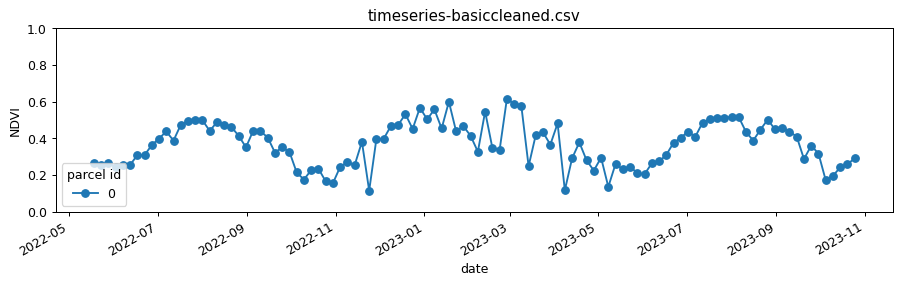

In [ ]:
plot_timeseries("ndvi-results/timeseries-basiccleaned.csv")

##Cloud Masking in NDVI

In [ ]:
import pandas as pd

# Load your dynamic CSV file containing NDVI data
csv_file_path = "ndvi-results/timeseries-basiccleaned.csv"
data = pd.read_csv(csv_file_path)

# Display the loaded CSV data to understand its structure
print(data.head())


                       date  feature_index  avg(band_0)   Latitude  Longitude
0  2022-05-23T00:00:00.000Z              0     0.254016  31.097778  32.126892
1  2022-06-02T00:00:00.000Z              0     0.243558  31.069153  32.176819
2  2022-06-07T00:00:00.000Z              0     0.254284  31.037659  32.184753
3  2022-06-12T00:00:00.000Z              0     0.255517  30.937134  32.208740
4  2022-06-22T00:00:00.000Z              0     0.309491  30.934509  32.203674


In [ ]:
# Extract required columns from the DataFrame
latitude = data['Latitude'].values
longitude = data['Longitude'].values
ndvi_values = data['avg(band_0)'].values  # Assuming NDVI values are in the 'avg(band_0)' column

# Define a threshold to identify cloudy pixels based on NDVI
cloud_threshold = 0.2  # Adjust this threshold based on your specific data characteristics

# Create a mask based on the NDVI threshold
mask = ndvi_values > cloud_threshold

# Apply the mask to filter out cloudy pixels
masked_ndvi_values = ndvi_values[mask]
masked_latitude = latitude[mask]
masked_longitude = longitude[mask]


In [ ]:
# Create a new DataFrame with masked NDVI values and corresponding coordinates
masked_ndvi_data = pd.DataFrame({
    'Latitude': masked_latitude,
    'Longitude': masked_longitude,
    'Masked_NDVI': masked_ndvi_values
})

# Save the masked NDVI data to a new CSV file
output_csv_path = "ndvi-results/cloudmasking-basiccleaned.csv"
masked_ndvi_data.to_csv(output_csv_path, index=False)

print(f"Masked NDVI values saved to: {output_csv_path}")


Masked NDVI values saved to: ndvi-results/cloudmasking-basiccleaned.csv


##Timeseries Smoothing

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
n_samples = 30
dates = pd.date_range(start='2022-05-01', periods=n_samples, freq='D')
latitude = np.random.uniform(30, 32, size=n_samples)
longitude = np.random.uniform(31, 33, size=n_samples)
ndvi_values = np.random.uniform(0.2, 0.8, size=n_samples)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Latitude': latitude,
    'Longitude': longitude,
    'NDVI': ndvi_values
})

# Write DataFrame to CSV
df.to_csv('ndvi-results/cloudmasking-basiccleaned.csv', index=False)


In [ ]:
# Read CSV data
df = pd.read_csv('ndvi-results/cloudmasking-basiccleaned.csv', parse_dates=['Date'])

# Extract NDVI values
timestamps = df['Date']
ndvi_values = df['NDVI'].values

# Perform time smoothing using Savitzky-Golay filter
window_length = 5  # Window size for smoothing
poly_order = 2  # Polynomial order
smoothed_ndvi = savgol_filter(ndvi_values, window_length, poly_order)

# Add smoothed NDVI values to DataFrame
df['Smoothed_NDVI'] = smoothed_ndvi

# Save DataFrame with smoothed NDVI to CSV
df.to_csv('ndvi-results/timesmoothed-basiccleaned.csv', index=False)


In [ ]:
import pandas as pd

# Load your dynamic CSV file containing NDVI data
csv_file_path = "ndvi-results/timesmoothed-basiccleaned.csv"
data = pd.read_csv(csv_file_path)

# Display the loaded CSV data to understand its structure
print(data.head())


         Date   Latitude  Longitude      NDVI  Smoothed_NDVI
0  2022-05-01  31.097627  31.529111  0.295382       0.266022
1  2022-05-02  31.430379  32.548467  0.266225       0.381504
2  2022-05-03  31.205527  31.912301  0.593798       0.424120
3  2022-05-04  31.089766  32.136868  0.282910       0.391087
4  2022-05-05  30.847310  31.037580  0.317949       0.285591


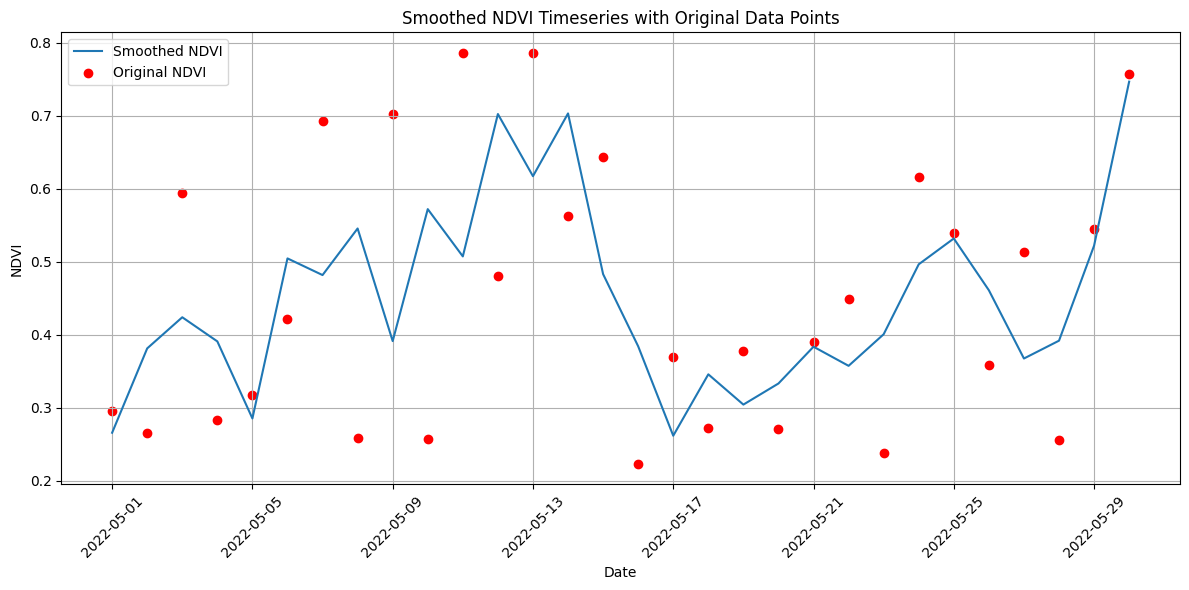

In [ ]:
# Plot smoothed NDVI timeseries
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Smoothed_NDVI'], label='Smoothed NDVI')
plt.scatter(df['Date'], df['NDVI'], color='red', label='Original NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('Smoothed NDVI Timeseries with Original Data Points')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Rasterization for NDVI

In [ ]:
df= pd.read_csv("coordinates.csv")
df


,Latitude,Longitude
0,31.097778,32.126892
1,31.069153,32.176819
2,31.037659,32.184753
3,30.937134,32.208740
4,30.934509,32.203674
...,...,...
105,31.077515,31.887085
106,31.088501,31.942993
107,31.110535,31.972717
108,31.113831,32.051208


In [ ]:
import pandas as pd

# Load the CSV file containing the NDVI time series
ndVi_df = pd.read_csv("ndvi-results/timesmoothed-basiccleaned.csv", index_col=0)

# Print the shape of the NDVI DataFrame
print("Shape of NDVI DataFrame:", ndVi_df.shape)

# Print the first few rows of the NDVI DataFrame
print("First few rows of NDVI DataFrame:")
print(ndVi_df.head())


Shape of NDVI DataFrame: (30, 4)
First few rows of NDVI DataFrame:
             Latitude  Longitude      NDVI  Smoothed_NDVI
Date                                                     
2022-05-01  31.097627  31.529111  0.295382       0.266022
2022-05-02  31.430379  32.548467  0.266225       0.381504
2022-05-03  31.205527  31.912301  0.593798       0.424120
2022-05-04  31.089766  32.136868  0.282910       0.391087
2022-05-05  30.847310  31.037580  0.317949       0.285591


In [ ]:
# Given coordinates
shapefile_bounds = [32.12689208984375, 31.0977783203125, 32.17681884765625, 31.06915283203125, 32.18475341796875, 31.03765869140625, 32.208740234375, 30.9371337890625, 32.20367431640625, 30.93450927734375, 32.181365966796875, 30.921539306640625, 32.17816162109375, 30.89752197265625, 32.16253662109375, 30.73321533203125, 32.15948486328125, 30.6815185546875, 32.15924072265625, 30.677978515625, 32.17486572265625, 30.6258544921875, 32.11962890625, 30.60650634765625, 32.10906982421875, 30.595947265625, 32.1278076171875, 30.56268310546875, 32.07037353515625, 30.5548095703125, 32.0655517578125, 30.5633544921875, 32.00830078125, 30.571044921875, 31.97662353515625, 30.575439453125, 31.865966796875, 30.555419921875, 31.7716064453125, 30.5732421875, 31.752685546875, 30.55810546875, 31.75689697265625, 30.52593994140625, 31.76568603515625, 30.51824951171875, 31.808563232421875, 30.52398681640625, 31.82196044921875, 30.49493408203125, 31.79864501953125, 30.482177734375, 31.79888916015625, 30.4742431640625, 31.83978271484375, 30.27166748046875, 31.86102294921875, 30.18780517578125, 31.59185791015625, 30.197509765625, 31.56658935546875, 30.2406005859375, 31.55621337890625, 30.2578125, 31.53271484375, 30.27032470703125, 31.38970947265625, 30.28790283203125, 31.384670192531544, 30.292616379220142, 31.372772216796875, 30.30377197265625, 31.3734130859375, 30.32379150390625, 31.34130859375, 30.34136962890625, 31.34283447265625, 30.3568115234375, 31.35406494140625, 30.357421875, 31.3531494140625, 30.36907958984375, 31.34326171875, 30.3724365234375, 31.3468017578125, 30.38165283203125, 31.33245849609375, 30.39044189453125, 31.33203125, 30.399658203125, 31.31048583984375, 30.41046142578125, 31.29705810546875, 30.42852783203125, 31.305419921875, 30.43597412109375, 31.267578125, 30.45556640625, 31.27484130859375, 30.466552734375, 31.26934814453125, 30.49365234375, 31.29046630859375, 30.52069091796875, 31.28851318359375, 30.54071044921875, 31.3021240234375, 30.5455322265625, 31.2957763671875, 30.5701904296875, 31.3089599609375, 30.5770263671875, 31.3287353515625, 30.57171630859375, 31.34698486328125, 30.59814453125, 31.34173583984375, 30.6080322265625, 31.34527587890625, 30.6214599609375, 31.38751220703125, 30.62298583984375, 31.372314453125, 30.6636962890625, 31.39031982421875, 30.67205810546875, 31.38330078125, 30.6845703125, 31.38311767578125, 30.70440673828125, 31.37384033203125, 30.7103271484375, 31.379150390625, 30.71295166015625, 31.38311767578125, 30.7147216796875, 31.36920166015625, 30.73736572265625, 31.37408447265625, 30.7459716796875, 31.3646240234375, 30.7470703125, 31.36639404296875, 30.74993896484375, 31.37188720703125, 30.75982666015625, 31.36749267578125, 30.77191162109375, 31.36395263671875, 30.78094482421875, 31.3731689453125, 30.784912109375, 31.378203714656088, 30.804911332045364, 31.3798828125, 30.811431884765625, 31.40484619140625, 30.81195068359375, 31.41278076171875, 30.802734375, 31.4315185546875, 30.811279296875, 31.43280029296875, 30.81793212890625, 31.4332275390625, 30.82073974609375, 31.4625244140625, 30.82537841796875, 31.48516845703125, 30.81109619140625, 31.525634765625, 30.82342529296875, 31.5733642578125, 30.81414794921875, 31.5936279296875, 30.82122802734375, 31.59539794921875, 30.84014892578125, 31.6328125, 30.849365234375, 31.63848876953125, 30.86541748046875, 31.6424560546875, 30.87689208984375, 31.61761474609375, 30.90130615234375, 31.62640380859375, 30.92132568359375, 31.66778564453125, 30.9208984375, 31.6893310546875, 30.9404296875, 31.68621826171875, 30.97100830078125, 31.71441650390625, 30.99609375, 31.73663330078125, 31.01593017578125, 31.745849609375, 31.04229736328125, 31.779296875, 31.0654296875, 31.78240966796875, 31.06585693359375, 31.80548095703125, 31.06890869140625, 31.837158203125, 31.07598876953125, 31.85540771484375, 31.07110595703125, 31.8870849609375, 31.0775146484375, 31.9429931640625, 31.0885009765625, 31.97271728515625, 31.11053466796875, 32.05120849609375, 31.11383056640625, 32.12689208984375, 31.0977783203125]

# Extracting the real max and min for x and y
xmin = min(shapefile_bounds[::2])
xmax = max(shapefile_bounds[::2])
ymin = min(shapefile_bounds[1::2])
ymax = max(shapefile_bounds[1::2])

# Output the shapefile bounds
print("xmin:", xmin)
print("ymin:", ymin)
print("xmax:", xmax)
print("ymax:", ymax)


xmin: 31.267578125
ymin: 30.18780517578125
xmax: 32.208740234375
ymax: 31.11383056640625


In [ ]:
import pandas as pd
import numpy as np
import rasterio
from rasterio.transform import from_origin
from scipy.interpolate import interp2d

# Load combined CSV file
combined_df = pd.read_csv("ndvi-results/timesmoothed-basiccleaned.csv")

# Shapefile bounds
shapefile_bounds = [31.267578125,0.18780517578125,32.208740234375,31.11383056640625]

# Update raster bounds
xmin = shapefile_bounds[0]  # Minimum X coordinate
ymin = shapefile_bounds[1]  # Minimum Y coordinate
xmax = shapefile_bounds[2]  # Maximum X coordinate
ymax = shapefile_bounds[3]  # Maximum Y coordinate

# Define resolution and buffer for raster bounds adjustment
resolution = 0.01  # Resolution in degrees
buffer = 0.1       # Buffer to extend raster bounds beyond data extent

# Adjust raster bounds with buffer
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

# Calculate raster dimensions
width = 91
height = 101

# Filter data points within raster bounds
filtered_df = combined_df[(combined_df['Latitude'] >= ymin) & (combined_df['Latitude'] <= ymax) &
                          (combined_df['Longitude'] >= xmin) & (combined_df['Longitude'] <= xmax)]

# Extract latitude, longitude, and NDVI values from filtered data
latitude = filtered_df['Latitude'].values
longitude = filtered_df['Longitude'].values
ndvi = filtered_df['Smoothed_NDVI'].values

# Create interpolation function
f = interp2d(longitude, latitude, ndvi, kind='linear')

# Generate grid of coordinates for raster
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)

# Interpolate moisture values for raster grid
ndvi_grid = f(x, y)

# Create raster image
with rasterio.open(
    'raster_output1.tif',
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=np.float64,
    crs='EPSG:32636',
    transform=from_origin(xmin, ymax, resolution, resolution),
) as dst:
    dst.write(ndvi_grid, 1)


<ipython-input-100-5f41f933b5ab>:43: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(longitude, latitude, ndvi, kind='linear')
<ipython-input-100-5f41f933b5ab>:50: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for reg

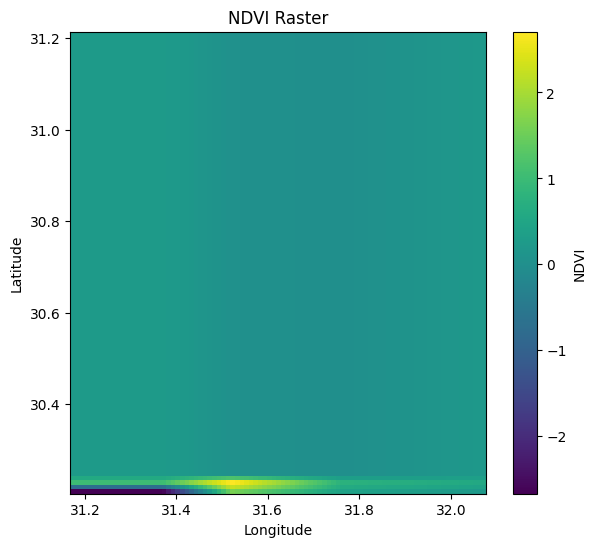

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open('raster_output1.tif') as src:
    # Read the raster data
    raster_data = src.read(1)

    # Plot the raster data
    plt.figure(figsize=(7, 6))
    plt.imshow(raster_data, cmap='viridis', extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])
    plt.colorbar(label='NDVI')
    plt.title('NDVI Raster')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [ ]:
from google.colab import files

# Replace 'raster_output1.tif' with the path to your file if it's in a different directory
files.download('raster_output1.tif')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Info about raster image For NDVI:


*   The "Transform" or "Affine matrix" represents the geometric transformation from pixel coordinates to real-world coordinates in the raster dataset. It is a 2D affine transformation matrix that defines how to map the pixel coordinates of the raster to the real-world spatial coordinates.

*   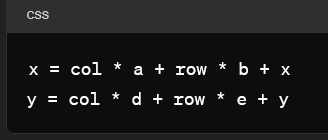



*  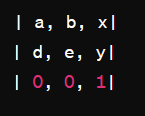






In [ ]:
import rasterio

# Open the raster file in read mode
with rasterio.open('raster_output1.tif', 'r') as src:
    # Get basic information about the raster
    print("Raster Information:")
    print("Dimensions (width, height):", src.width, "x", src.height)
    print("Number of bands:", src.count)
    print("Data type:", src.dtypes[0])
    print("Coordinate Reference System (CRS):", src.crs)

    # Get geospatial information
    transform = src.transform
    print("\nGeospatial Information:")
    print("Transform (Affine matrix):", transform)
    print("Resolution (pixel size):", transform.a, "x", transform.e)
    print("Bounding Box (minx, miny, maxx, maxy):", src.bounds)

    # Get statistics of the raster data
    for i in range(1, src.count + 1):
        band = src.read(i)
        print("\nStatistics for Band", i, ":")
        print("Minimum value:", band.min())
        print("Maximum value:", band.max())
        print("Mean value:", band.mean())
        print("Standard deviation:", band.std())




Raster Information:
Dimensions (width, height): 91 x 101
Number of bands: 1
Data type: float64
Coordinate Reference System (CRS): EPSG:32636

Geospatial Information:
Transform (Affine matrix): | 0.01, 0.00, 31.17|
| 0.00,-0.01, 31.21|
| 0.00, 0.00, 1.00|
Resolution (pixel size): 0.01 x -0.01
Bounding Box (minx, miny, maxx, maxy): BoundingBox(left=31.167578125, bottom=30.20383056640625, right=32.077578124999995, top=31.21383056640625)

Statistics for Band 1 :
Minimum value: -2.6669399828499407
Maximum value: 2.7056064003645703
Mean value: 0.1420868022357334
Standard deviation: 0.244549975355274


##Calcualting NDWI (Feature 2)(YEAR 2020) with bands 3 and 8 " Green & NIR " "RICE"

In [ ]:
fields = json.loads(
    """{
    "type": "FeatureCollection",
    "features": [
       {"type": "Feature", "properties": {}, "geometry":{"type":"Polygon","coordinates":[[[32.12689208984375,31.0977783203125],[32.17681884765625,31.06915283203125],[32.18475341796875,31.03765869140625],[32.208740234375,30.9371337890625],[32.20367431640625,30.93450927734375],[32.181365966796875,30.921539306640625],[32.17816162109375,30.89752197265625],[32.16253662109375,30.73321533203125],[32.15948486328125,30.6815185546875],[32.15924072265625,30.677978515625],[32.17486572265625,30.6258544921875],[32.11962890625,30.60650634765625],[32.10906982421875,30.595947265625],[32.1278076171875,30.56268310546875],[32.07037353515625,30.5548095703125],[32.0655517578125,30.5633544921875],[32.00830078125,30.571044921875],[31.97662353515625,30.575439453125],[31.865966796875,30.555419921875],[31.7716064453125,30.5732421875],[31.752685546875,30.55810546875],[31.75689697265625,30.52593994140625],[31.76568603515625,30.51824951171875],[31.3798828125,30.811431884765625],[31.40484619140625,30.81195068359375],[31.41278076171875,30.802734375],[31.4315185546875,30.811279296875],[31.43280029296875,30.81793212890625],[31.4332275390625,30.82073974609375],[31.4625244140625,30.82537841796875],[31.48516845703125,30.81109619140625]]]}}


    ]}
"""
)

In [ ]:
s2cube = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-05-15", "2023-10-30"],
    bands=["B03", "B08"],
)

In [ ]:
green = s2cube.band("B03")
nir = s2cube.band("B08")
ndwi = (green - nir) / (green + nir)

In [ ]:
timeseries = ndwi.aggregate_spatial(geometries=fields, reducer="mean")

In [ ]:
job = timeseries.execute_batch(out_format="CSV", title="NDWI timeseries")

0:00:00 Job 'j-240517d1eecc4ea191c35581f79bf021': send 'start'
0:00:19 Job 'j-240517d1eecc4ea191c35581f79bf021': created (progress 0%)
0:00:27 Job 'j-240517d1eecc4ea191c35581f79bf021': created (progress 0%)
0:00:34 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:00:43 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:00:53 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:01:06 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:01:22 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:01:43 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:02:08 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:02:44 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:03:22 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:04:09 Job 'j-240517d1eecc4ea191c35581f79bf021': running (progress N/A)
0:05:07 Job 'j-240517d1eecc4ea191c35581f79bf021': running (prog

In [ ]:
job.get_results().download_file("ndwi-results/timeseries-basic.csv")
pd.read_csv("ndwi-results/timeseries-basic.csv", index_col=0).head()

,feature_index,avg(band_0)
date,,
2023-09-15T00:00:00.000Z,0,-0.437352
2022-05-23T00:00:00.000Z,0,-0.326214
2022-06-02T00:00:00.000Z,0,-0.299810
2022-06-12T00:00:00.000Z,0,-0.304847
2022-06-27T00:00:00.000Z,0,-0.397434


In [ ]:
def plot_timeseries(filename, figsize=(12, 3)):
    df = pd.read_csv(filename, index_col=0)
    df.index = pd.to_datetime(df.index)

    fig, ax = plt.subplots(figsize=figsize, dpi=90)
    df.groupby("feature_index")["avg(band_0)"].plot(marker="o", ax=ax)
    ax.set_title(filename.split("/")[-1])
    ax.set_ylabel("NDWi")
    ax.set_ylim(0, 1)
    ax.legend(title="parcel id", loc="lower left", ncol=2)

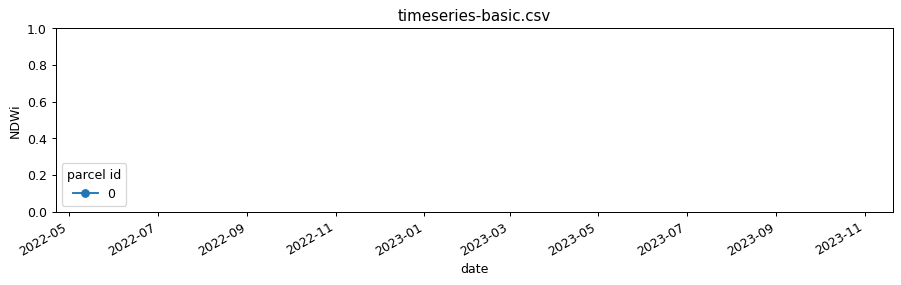

In [ ]:
plot_timeseries("ndwi-results/timeseries-basic.csv")

In [ ]:
# merge the dataset in same file of ndwi

# Load latitude and longitude data
coordinates_data = pd.read_csv("coordinates.csv")

# Load NDVI time series data
ndwi_data = pd.read_csv("ndwi-results/timeseries-basic.csv")

# Add latitude and longitude columns to ndvi_data
ndwi_data["Latitude"] = coordinates_data["Latitude"]
ndwi_data["Longitude"] = coordinates_data["Longitude"]



## Downlad csv File

In [ ]:
# from google.colab import files

# # Path to the file you want to download
# file_path = "moisture-results/timeseries-basic.csv"

# # Download the file
# files.download(file_path)


In [ ]:
ndwi_data.shape

(106, 5)

In [ ]:
ndwi_data.head(12)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2023-09-15T00:00:00.000Z,0,-0.437352,31.097778,32.126892
1,2022-05-23T00:00:00.000Z,0,-0.326214,31.069153,32.176819
2,2022-06-02T00:00:00.000Z,0,-0.299810,31.037659,32.184753
3,2022-06-12T00:00:00.000Z,0,-0.304847,30.937134,32.208740
4,2022-06-27T00:00:00.000Z,0,-0.397434,30.934509,32.203674
5,2022-07-02T00:00:00.000Z,0,-0.410092,30.921539,32.181366
6,2022-07-17T00:00:00.000Z,0,-0.474142,30.897522,32.178162
7,2022-08-01T00:00:00.000Z,0,-0.489667,30.733215,32.162537
8,2022-08-16T00:00:00.000Z,0,-0.467028,30.681519,32.159485
9,2022-09-05T00:00:00.000Z,0,-0.451494,30.677979,32.159241


In [ ]:
ndwi_data_cleaned = ndwi_data.dropna()

In [ ]:
# ndvi_data.shape
ndwi_data_cleaned.shape

(106, 5)

In [ ]:
ndwi_data_cleaned.to_csv("ndwi-results/timeseries-basiccleaned.csv", index=False)

In [ ]:
ndwi_data_cleaned.head(18)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2023-09-15T00:00:00.000Z,0,-0.437352,31.097778,32.126892
1,2022-05-23T00:00:00.000Z,0,-0.326214,31.069153,32.176819
2,2022-06-02T00:00:00.000Z,0,-0.299810,31.037659,32.184753
3,2022-06-12T00:00:00.000Z,0,-0.304847,30.937134,32.208740
4,2022-06-27T00:00:00.000Z,0,-0.397434,30.934509,32.203674
5,2022-07-02T00:00:00.000Z,0,-0.410092,30.921539,32.181366
6,2022-07-17T00:00:00.000Z,0,-0.474142,30.897522,32.178162
7,2022-08-01T00:00:00.000Z,0,-0.489667,30.733215,32.162537
8,2022-08-16T00:00:00.000Z,0,-0.467028,30.681519,32.159485
9,2022-09-05T00:00:00.000Z,0,-0.451494,30.677979,32.159241


In [ ]:
ndwi_csv = pd.read_csv("ndwi-results/timeseries-basiccleaned.csv")
ndwi_csv.head(15)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2023-09-15T00:00:00.000Z,0,-0.437352,31.097778,32.126892
1,2022-05-23T00:00:00.000Z,0,-0.326214,31.069153,32.176819
2,2022-06-02T00:00:00.000Z,0,-0.299810,31.037659,32.184753
3,2022-06-12T00:00:00.000Z,0,-0.304847,30.937134,32.208740
4,2022-06-27T00:00:00.000Z,0,-0.397434,30.934509,32.203674
5,2022-07-02T00:00:00.000Z,0,-0.410092,30.921539,32.181366
6,2022-07-17T00:00:00.000Z,0,-0.474142,30.897522,32.178162
7,2022-08-01T00:00:00.000Z,0,-0.489667,30.733215,32.162537
8,2022-08-16T00:00:00.000Z,0,-0.467028,30.681519,32.159485
9,2022-09-05T00:00:00.000Z,0,-0.451494,30.677979,32.159241


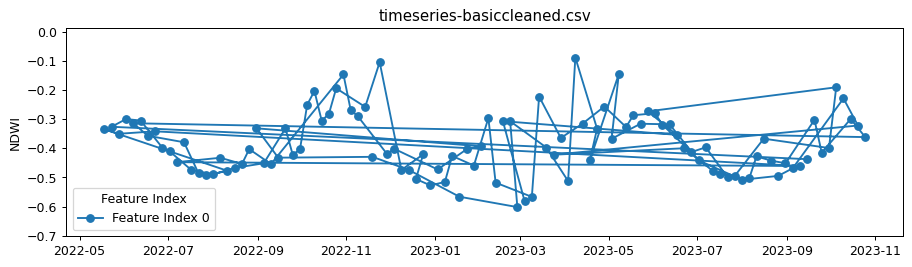

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_timeseries(filename, figsize=(12, 3)):
    # Read the CSV file and parse dates
    df = pd.read_csv(filename)
    df['date'] = pd.to_datetime(df['date'])

    # Create figure and axes
    fig, ax = plt.subplots(figsize=figsize, dpi=90)

    # Plot timeseries for each feature index
    for feature_index, group_df in df.groupby("feature_index"):
        if len(group_df) > 1:  # Check if there are enough data points to plot
            ax.plot(group_df['date'], group_df['avg(band_0)'], marker="o", label=f"Feature Index {feature_index}")

    # Set title and labels
    ax.set_title(filename.split("/")[-1])
    ax.set_ylabel("NDWI")
    ax.set_ylim(df['avg(band_0)'].min() - 0.1, df['avg(band_0)'].max() + 0.1)  # Set y-axis limits dynamically
    ax.legend(title="Feature Index", loc="lower left", ncol=2)

    # Show plot
    plt.show()

# Example usage:
filename = "ndwi-results/timeseries-basiccleaned.csv"  # Replace with the path to your CSV file
plot_timeseries(filename)


## Rasterization for NDWI

In [ ]:
df= pd.read_csv("coordinates.csv")
df


,Latitude,Longitude
0,31.097778,32.126892
1,31.069153,32.176819
2,31.037659,32.184753
3,30.937134,32.208740
4,30.934509,32.203674
...,...,...
105,31.077515,31.887085
106,31.088501,31.942993
107,31.110535,31.972717
108,31.113831,32.051208


In [ ]:
import pandas as pd

# Load the CSV file containing the NDVI time series
ndWi_df = pd.read_csv("ndwi-results/timeseries-basiccleaned.csv", index_col=0)

# Print the shape of the NDVI DataFrame
print("Shape of NDWI DataFrame:", ndWi_df.shape)

# Print the first few rows of the NDVI DataFrame
print("First few rows of NDWI DataFrame:")
print(ndWi_df.head())


Shape of NDWI DataFrame: (106, 4)
First few rows of NDWI DataFrame:
                          feature_index  avg(band_0)   Latitude  Longitude
date                                                                      
2023-09-15T00:00:00.000Z              0    -0.437352  31.097778  32.126892
2022-05-23T00:00:00.000Z              0    -0.326214  31.069153  32.176819
2022-06-02T00:00:00.000Z              0    -0.299810  31.037659  32.184753
2022-06-12T00:00:00.000Z              0    -0.304847  30.937134  32.208740
2022-06-27T00:00:00.000Z              0    -0.397434  30.934509  32.203674


In [ ]:
import pandas as pd

# Load the CSV file
file_path = "ndwi-results/timeseries-basiccleaned.csv"
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit(1)
except Exception as e:
    print(f"Error loading file: {e}")
    exit(1)

# Drop the 'feature_index' column
if 'feature_index' in df.columns:
    df.drop(columns=['feature_index'], inplace=True)
    print("Column 'feature_index' dropped successfully.")
else:
    print("Column 'feature_index' not found.")

# Save the modified DataFrame back to a CSV file
output_file_path = "ndwi-results/timeseries-basiccleaned_without_index.csv"
try:
    df.to_csv(output_file_path, index=False)
    print(f"Modified DataFrame saved to '{output_file_path}'.")
except Exception as e:
    print(f"Error saving file: {e}")


File loaded successfully.
Column 'feature_index' dropped successfully.
Modified DataFrame saved to 'ndwi-results/timeseries-basiccleaned_without_index.csv'.


In [ ]:
import pandas as pd
import numpy as np
import rasterio
from rasterio.transform import from_origin
from scipy.interpolate import interp2d

# Load combined CSV file
combined_df = pd.read_csv("ndwi-results/timeseries-basiccleaned_without_index.csv")

# Shapefile bounds
shapefile_bounds = [31.267578125,0.18780517578125,32.208740234375,31.11383056640625]

# Update raster bounds
xmin = shapefile_bounds[0]  # Minimum X coordinate
ymin = shapefile_bounds[1]  # Minimum Y coordinate
xmax = shapefile_bounds[2]  # Maximum X coordinate
ymax = shapefile_bounds[3]  # Maximum Y coordinate

# Define resolution and buffer for raster bounds adjustment
resolution = 0.01  # Resolution in degrees
buffer = 0.1       # Buffer to extend raster bounds beyond data extent

# Adjust raster bounds with buffer
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

# Calculate raster dimensions
width = 91
height = 101

# Filter data points within raster bounds
filtered_df = combined_df[(combined_df['Latitude'] >= ymin) & (combined_df['Latitude'] <= ymax) &
                          (combined_df['Longitude'] >= xmin) & (combined_df['Longitude'] <= xmax)]

# Extract latitude, longitude, and NDVI values from filtered data
latitude = filtered_df['Latitude'].values
longitude = filtered_df['Longitude'].values
ndwi = filtered_df['avg(band_0)'].values

# Create interpolation function
f = interp2d(longitude, latitude, ndwi, kind='linear')

# Generate grid of coordinates for raster
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)

# Interpolate moisture values for raster grid
ndwi_grid = f(x, y)

# Create raster image
with rasterio.open(
    'raster_output2.tif',
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=np.float64,
    crs='EPSG:32636',
    transform=from_origin(xmin, ymax, resolution, resolution),
) as dst:
    dst.write(ndwi_grid, 1)


<ipython-input-125-0ab91049d12a>:43: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(longitude, latitude, ndwi, kind='linear')
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,13 m=106 fp=0.143173 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
<ipython

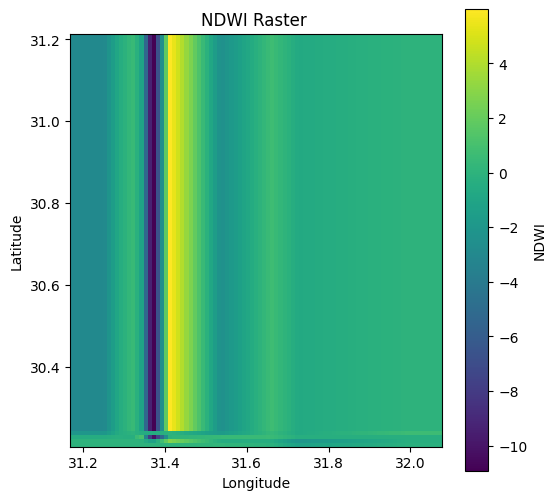

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open("raster_output2.tif") as src:
    # Read the raster data
    raster_data = src.read(1)

    # Plot the raster data
    plt.figure(figsize=(6, 6))
    plt.imshow(raster_data, cmap='viridis', extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])
    plt.colorbar(label='NDWI')
    plt.title('NDWI Raster ')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [ ]:
from google.colab import files

# Replace 'raster_output1.tif' with the path to your file if it's in a different directory
files.download('raster_output2.tif')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Info about raster image For NDWI:

In [ ]:
import rasterio

# Open the raster file in read mode
with rasterio.open('raster_output2.tif', 'r') as src:
    # Get basic information about the raster
    print("Raster Information:")
    print("Dimensions (width, height):", src.width, "x", src.height)
    print("Number of bands:", src.count)
    print("Data type:", src.dtypes[0])
    print("Coordinate Reference System (CRS):", src.crs)

    # Get geospatial information
    transform = src.transform
    print("\nGeospatial Information:")
    print("Transform (Affine matrix):", transform)
    print("Resolution (pixel size):", transform.a, "x", transform.e)
    print("Bounding Box (minx, miny, maxx, maxy):", src.bounds)

    # Get statistics of the raster data
    for i in range(1, src.count + 1):
        band = src.read(i)
        print("\nStatistics for Band", i, ":")
        print("Minimum value:", band.min())
        print("Maximum value:", band.max())
        print("Mean value:", band.mean())
        print("Standard deviation:", band.std())

    # # Get histogram of pixel values
    # for i in range(1, src.count + 1):
    #     histogram = src.histogram(i)
    #     print("\nHistogram for Band", i, ":")
    #     print(histogram)


Raster Information:
Dimensions (width, height): 91 x 101
Number of bands: 1
Data type: float64
Coordinate Reference System (CRS): EPSG:32636

Geospatial Information:
Transform (Affine matrix): | 0.01, 0.00, 31.17|
| 0.00,-0.01, 31.21|
| 0.00, 0.00, 1.00|
Resolution (pixel size): 0.01 x -0.01
Bounding Box (minx, miny, maxx, maxy): BoundingBox(left=31.167578125, bottom=30.20383056640625, right=32.077578124999995, top=31.21383056640625)

Statistics for Band 1 :
Minimum value: -10.939104723172367
Maximum value: 5.982514565668233
Mean value: -0.6380113493411658
Standard deviation: 2.301994081639898


##Calculating NDSI (Feature 3)(YEAR 2020) with bands 3 and 11 " Green & SWIR ""RICE"

In [ ]:
fields = json.loads(
    """{
    "type": "FeatureCollection",
    "features": [
       {"type": "Feature", "properties": {}, "geometry":{"type":"Polygon","coordinates":[[[32.12689208984375,31.0977783203125],[32.17681884765625,31.06915283203125],[32.18475341796875,31.03765869140625],[32.208740234375,30.9371337890625],[32.20367431640625,30.93450927734375],[32.181365966796875,30.921539306640625],[32.17816162109375,30.89752197265625],[32.16253662109375,30.73321533203125],[32.15948486328125,30.6815185546875],[32.15924072265625,30.677978515625],[32.17486572265625,30.6258544921875],[32.11962890625,30.60650634765625],[32.10906982421875,30.595947265625],[32.1278076171875,30.56268310546875],[32.07037353515625,30.5548095703125],[32.0655517578125,30.5633544921875],[32.00830078125,30.571044921875],[31.97662353515625,30.575439453125],[31.865966796875,30.555419921875],[31.7716064453125,30.5732421875],[31.752685546875,30.55810546875],[31.75689697265625,30.52593994140625],[31.76568603515625,30.51824951171875],[31.3798828125,30.811431884765625],[31.40484619140625,30.81195068359375],[31.41278076171875,30.802734375],[31.4315185546875,30.811279296875],[31.43280029296875,30.81793212890625],[31.4332275390625,30.82073974609375],[31.4625244140625,30.82537841796875],[31.48516845703125,30.81109619140625]]]}}


    ]}
"""
)

In [ ]:
s2cube = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-05-15", "2023-10-30"],
    bands=["B03", "B11"],
)

In [ ]:
green = s2cube.band("B03")
swir = s2cube.band("B11")
ndsi = (green - swir) / (green + swir)

In [ ]:
timeseries = ndsi.aggregate_spatial(geometries=fields, reducer="mean")

In [ ]:
job = timeseries.execute_batch(out_format="CSV", title="NDSI timeseries")

0:00:00 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': send 'start'
0:00:17 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': created (progress 0%)
0:00:22 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': created (progress 0%)
0:00:29 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': created (progress 0%)
0:00:38 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progress N/A)
0:00:48 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progress N/A)
0:01:01 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progress N/A)
0:01:17 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progress N/A)
0:01:37 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progress N/A)
0:02:04 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progress N/A)
0:02:34 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progress N/A)
0:03:13 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progress N/A)
0:04:02 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progress N/A)
0:05:02 Job 'j-2405179dfc504ac782a4f06ed4f31d5b': running (progr

In [ ]:
job.get_results().download_file("ndsi-results/timeseries-basic.csv")
pd.read_csv("ndsi-results/timeseries-basic.csv", index_col=0).head()

,feature_index,avg(band_0)
date,,
2022-05-18T00:00:00.000Z,0,-0.314482
2022-05-28T00:00:00.000Z,0,-0.348589
2022-06-02T00:00:00.000Z,0,-0.264689
2022-06-07T00:00:00.000Z,0,-0.285037
2022-06-17T00:00:00.000Z,0,-0.320466


In [ ]:
# merge the dataset in same file of ndvi

# Load latitude and longitude data
coordinates_data = pd.read_csv("coordinates.csv")

# Load NDVI time series data
ndsi_data = pd.read_csv("ndsi-results/timeseries-basic.csv")

# Add latitude and longitude columns to ndvi_data
ndsi_data["Latitude"] = coordinates_data["Latitude"]
ndsi_data["Longitude"] = coordinates_data["Longitude"]




In [ ]:
ndsi_data.shape

(106, 5)

In [ ]:

ndsi_data.head(12)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-18T00:00:00.000Z,0,-0.314482,31.097778,32.126892
1,2022-05-28T00:00:00.000Z,0,-0.348589,31.069153,32.176819
2,2022-06-02T00:00:00.000Z,0,-0.264689,31.037659,32.184753
3,2022-06-07T00:00:00.000Z,0,-0.285037,30.937134,32.208740
4,2022-06-17T00:00:00.000Z,0,-0.320466,30.934509,32.203674
5,2022-06-22T00:00:00.000Z,0,-0.286565,30.921539,32.181366
6,2022-06-27T00:00:00.000Z,0,-0.333933,30.897522,32.178162
7,2022-07-17T00:00:00.000Z,0,-0.376901,30.733215,32.162537
8,2022-06-12T00:00:00.000Z,0,-0.264096,30.681519,32.159485
9,2022-08-01T00:00:00.000Z,0,-0.384517,30.677979,32.159241


In [ ]:
ndsi_data_cleaned = ndsi_data.dropna()

In [ ]:
# ndvi_data.shape
ndsi_data_cleaned.shape

(106, 5)

In [ ]:
ndsi_data_cleaned.to_csv("ndsi-results/timeseries-basiccleaned.csv", index=False)

In [ ]:
ndsi_data_cleaned.head(18)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-18T00:00:00.000Z,0,-0.314482,31.097778,32.126892
1,2022-05-28T00:00:00.000Z,0,-0.348589,31.069153,32.176819
2,2022-06-02T00:00:00.000Z,0,-0.264689,31.037659,32.184753
3,2022-06-07T00:00:00.000Z,0,-0.285037,30.937134,32.208740
4,2022-06-17T00:00:00.000Z,0,-0.320466,30.934509,32.203674
5,2022-06-22T00:00:00.000Z,0,-0.286565,30.921539,32.181366
6,2022-06-27T00:00:00.000Z,0,-0.333933,30.897522,32.178162
7,2022-07-17T00:00:00.000Z,0,-0.376901,30.733215,32.162537
8,2022-06-12T00:00:00.000Z,0,-0.264096,30.681519,32.159485
9,2022-08-01T00:00:00.000Z,0,-0.384517,30.677979,32.159241


In [ ]:
ndsi_csv = pd.read_csv("ndsi-results/timeseries-basiccleaned.csv")
ndsi_csv.head(15)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-18T00:00:00.000Z,0,-0.314482,31.097778,32.126892
1,2022-05-28T00:00:00.000Z,0,-0.348589,31.069153,32.176819
2,2022-06-02T00:00:00.000Z,0,-0.264689,31.037659,32.184753
3,2022-06-07T00:00:00.000Z,0,-0.285037,30.937134,32.208740
4,2022-06-17T00:00:00.000Z,0,-0.320466,30.934509,32.203674
5,2022-06-22T00:00:00.000Z,0,-0.286565,30.921539,32.181366
6,2022-06-27T00:00:00.000Z,0,-0.333933,30.897522,32.178162
7,2022-07-17T00:00:00.000Z,0,-0.376901,30.733215,32.162537
8,2022-06-12T00:00:00.000Z,0,-0.264096,30.681519,32.159485
9,2022-08-01T00:00:00.000Z,0,-0.384517,30.677979,32.159241


In [ ]:
def plot_timeseries(filename, figsize=(10, 3)):
    df = pd.read_csv(filename, index_col=0)
    df.index = pd.to_datetime(df.index)

    fig, ax = plt.subplots(figsize=figsize, dpi=90)
    df.groupby("feature_index")["avg(band_0)"].plot(marker="o", ax=ax)
    ax.set_title(filename.split("/")[-1])
    ax.set_ylabel("NDSI")
    ax.set_ylim(0, 1)
    ax.legend(title="parcel id", loc="lower left", ncol=2)

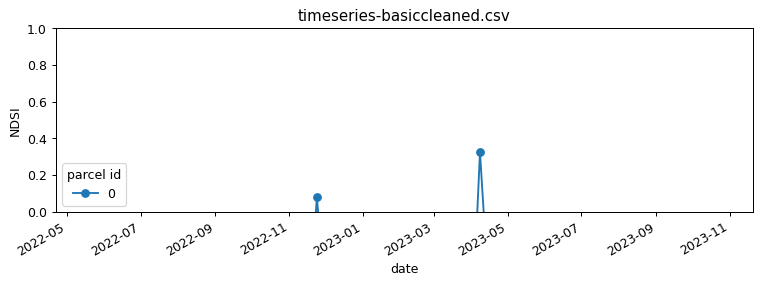

In [ ]:
plot_timeseries("ndsi-results/timeseries-basiccleaned.csv")

## Rasterization for NDSI

In [ ]:
df= pd.read_csv("coordinates.csv")
df


,Latitude,Longitude
0,31.097778,32.126892
1,31.069153,32.176819
2,31.037659,32.184753
3,30.937134,32.208740
4,30.934509,32.203674
...,...,...
105,31.077515,31.887085
106,31.088501,31.942993
107,31.110535,31.972717
108,31.113831,32.051208


In [ ]:
import pandas as pd

# Load the CSV file containing the NDVI time series
ndsi_df = pd.read_csv("ndsi-results/timeseries-basiccleaned.csv", index_col=0)

# Print the shape of the NDVI DataFrame
print("Shape of ndsi DataFrame:", ndsi_df.shape)

# Print the first few rows of the NDVI DataFrame
print("First few rows of ndsi DataFrame:")
print(ndsi_df.head())


Shape of ndsi DataFrame: (106, 4)
First few rows of ndsi DataFrame:
                          feature_index  avg(band_0)   Latitude  Longitude
date                                                                      
2022-05-18T00:00:00.000Z              0    -0.314482  31.097778  32.126892
2022-05-28T00:00:00.000Z              0    -0.348589  31.069153  32.176819
2022-06-02T00:00:00.000Z              0    -0.264689  31.037659  32.184753
2022-06-07T00:00:00.000Z              0    -0.285037  30.937134  32.208740
2022-06-17T00:00:00.000Z              0    -0.320466  30.934509  32.203674


In [ ]:
import pandas as pd

# Load the CSV file
file_path = "ndsi-results/timeseries-basiccleaned.csv"
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit(1)
except Exception as e:
    print(f"Error loading file: {e}")
    exit(1)

# Drop the 'feature_index' column
if 'feature_index' in df.columns:
    df.drop(columns=['feature_index'], inplace=True)
    print("Column 'feature_index' dropped successfully.")
else:
    print("Column 'feature_index' not found.")

# Save the modified DataFrame back to a CSV file
output_file_path = "ndsi-results/timeseries-basiccleaned_without_index.csv"
try:
    df.to_csv(output_file_path, index=False)
    print(f"Modified DataFrame saved to '{output_file_path}'.")
except Exception as e:
    print(f"Error saving file: {e}")


File loaded successfully.
Column 'feature_index' dropped successfully.
Modified DataFrame saved to 'ndsi-results/timeseries-basiccleaned_without_index.csv'.


In [ ]:
import pandas as pd
import numpy as np
import rasterio
from rasterio.transform import from_origin
from scipy.interpolate import interp2d

# Load combined CSV file
combined_df = pd.read_csv("ndsi-results/timeseries-basiccleaned_without_index.csv")

# Shapefile bounds
shapefile_bounds = [31.267578125,0.18780517578125,32.208740234375,31.11383056640625]

# Update raster bounds
xmin = shapefile_bounds[0]  # Minimum X coordinate
ymin = shapefile_bounds[1]  # Minimum Y coordinate
xmax = shapefile_bounds[2]  # Maximum X coordinate
ymax = shapefile_bounds[3]  # Maximum Y coordinate

# Define resolution and buffer for raster bounds adjustment
resolution = 0.01  # Resolution in degrees
buffer = 0.1       # Buffer to extend raster bounds beyond data extent

# Adjust raster bounds with buffer
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

# Calculate raster dimensions
width = 91
height = 101

# Filter data points within raster bounds
filtered_df = combined_df[(combined_df['Latitude'] >= ymin) & (combined_df['Latitude'] <= ymax) &
                          (combined_df['Longitude'] >= xmin) & (combined_df['Longitude'] <= xmax)]

# Extract latitude, longitude, and NDVI values from filtered data
latitude = filtered_df['Latitude'].values
longitude = filtered_df['Longitude'].values
ndsi = filtered_df['avg(band_0)'].values

# Create interpolation function
f = interp2d(longitude, latitude, ndsi, kind='linear')

# Generate grid of coordinates for raster
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)

# Interpolate moisture values for raster grid
ndsi_grid = f(x, y)

# Create raster image
with rasterio.open(
    'raster_output3.tif',
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=np.float64,
    crs='EPSG:32636',
    transform=from_origin(xmin, ymax, resolution, resolution),
) as dst:
    dst.write(ndsi_grid, 1)


<ipython-input-148-822ee6560420>:43: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(longitude, latitude, ndsi, kind='linear')
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,12 m=106 fp=0.227960 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
<ipython

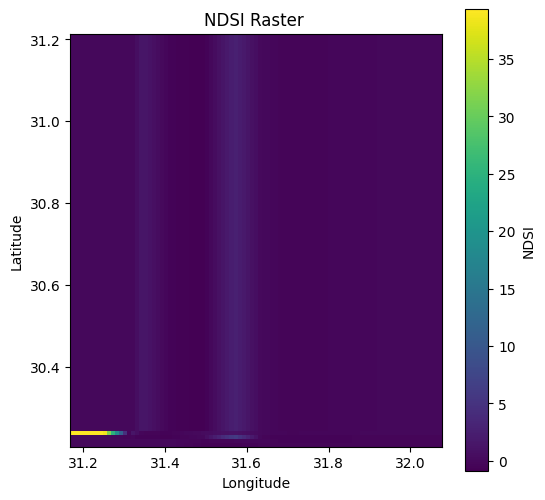

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open("raster_output3.tif") as src:
    # Read the raster data
    raster_data = src.read(1)

    # Plot the raster data
    plt.figure(figsize=(6, 6))
    plt.imshow(raster_data, cmap='viridis', extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])
    plt.colorbar(label='NDSI')
    plt.title('NDSI Raster ')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [ ]:
from google.colab import files

# Replace 'raster_output1.tif' with the path to your file if it's in a different directory
files.download('raster_output3.tif')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Info about raster image For NDSI:

In [ ]:
import rasterio

# Open the raster file in read mode
with rasterio.open('raster_output3.tif', 'r') as src:
    # Get basic information about the raster
    print("Raster Information:")
    print("Dimensions (width, height):", src.width, "x", src.height)
    print("Number of bands:", src.count)
    print("Data type:", src.dtypes[0])
    print("Coordinate Reference System (CRS):", src.crs)

    # Get geospatial information
    transform = src.transform
    print("\nGeospatial Information:")
    print("Transform (Affine matrix):", transform)
    print("Resolution (pixel size):", transform.a, "x", transform.e)
    print("Bounding Box (minx, miny, maxx, maxy):", src.bounds)

    # Get statistics of the raster data
    for i in range(1, src.count + 1):
        band = src.read(i)
        print("\nStatistics for Band", i, ":")
        print("Minimum value:", band.min())
        print("Maximum value:", band.max())
        print("Mean value:", band.mean())
        print("Standard deviation:", band.std())

    # # Get histogram of pixel values
    # for i in range(1, src.count + 1):
    #     histogram = src.histogram(i)
    #     print("\nHistogram for Band", i, ":")
    #     print(histogram)


Raster Information:
Dimensions (width, height): 91 x 101
Number of bands: 1
Data type: float64
Coordinate Reference System (CRS): EPSG:32636

Geospatial Information:
Transform (Affine matrix): | 0.01, 0.00, 31.17|
| 0.00,-0.01, 31.21|
| 0.00, 0.00, 1.00|
Resolution (pixel size): 0.01 x -0.01
Bounding Box (minx, miny, maxx, maxy): BoundingBox(left=31.167578125, bottom=30.20383056640625, right=32.077578124999995, top=31.21383056640625)

Statistics for Band 1 :
Minimum value: -0.9032401767734322
Maximum value: 39.322173380225784
Mean value: 0.12665074651849417
Standard deviation: 1.4814593930508289


##Calculating GNDVI (Feature 4)(YEAR 2020) with bands 3 and 8 " Green & NIR ""RICE"

In [ ]:
fields = json.loads(
    """{
    "type": "FeatureCollection",
    "features": [
       {"type": "Feature", "properties": {}, "geometry":{"type":"Polygon","coordinates":[[[32.12689208984375,31.0977783203125],[32.17681884765625,31.06915283203125],[32.18475341796875,31.03765869140625],[32.208740234375,30.9371337890625],[32.20367431640625,30.93450927734375],[32.181365966796875,30.921539306640625],[32.17816162109375,30.89752197265625],[32.16253662109375,30.73321533203125],[32.15948486328125,30.6815185546875],[32.15924072265625,30.677978515625],[32.17486572265625,30.6258544921875],[32.11962890625,30.60650634765625],[32.10906982421875,30.595947265625],[32.1278076171875,30.56268310546875],[32.07037353515625,30.5548095703125],[32.0655517578125,30.5633544921875],[32.00830078125,30.571044921875],[31.97662353515625,30.575439453125],[31.865966796875,30.555419921875],[31.7716064453125,30.5732421875],[31.752685546875,30.55810546875],[31.75689697265625,30.52593994140625],[31.76568603515625,30.51824951171875],[31.3798828125,30.811431884765625],[31.40484619140625,30.81195068359375],[31.41278076171875,30.802734375],[31.4315185546875,30.811279296875],[31.43280029296875,30.81793212890625],[31.4332275390625,30.82073974609375],[31.4625244140625,30.82537841796875],[31.48516845703125,30.81109619140625]]]}}


    ]}
"""
)

In [ ]:
s2cube = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-05-15", "2022-10-30"],
    bands=["B03", "B08"],
)

In [ ]:
green = s2cube.band("B03")
nir = s2cube.band("B08")
gndvi = (nir - green) / (nir + green)

In [ ]:
timeseries = gndvi.aggregate_spatial(geometries=fields, reducer="mean")

In [ ]:
job = timeseries.execute_batch(out_format="CSV", title="GNDVI timeseries")

0:00:00 Job 'j-240517b818bb499899c4cc6a2d419588': send 'start'
0:00:26 Job 'j-240517b818bb499899c4cc6a2d419588': created (progress 0%)
0:00:32 Job 'j-240517b818bb499899c4cc6a2d419588': created (progress 0%)
0:00:39 Job 'j-240517b818bb499899c4cc6a2d419588': created (progress 0%)
0:00:47 Job 'j-240517b818bb499899c4cc6a2d419588': created (progress 0%)
0:00:58 Job 'j-240517b818bb499899c4cc6a2d419588': created (progress 0%)
0:01:12 Job 'j-240517b818bb499899c4cc6a2d419588': created (progress 0%)
0:01:28 Job 'j-240517b818bb499899c4cc6a2d419588': created (progress 0%)
0:01:48 Job 'j-240517b818bb499899c4cc6a2d419588': running (progress N/A)
0:02:13 Job 'j-240517b818bb499899c4cc6a2d419588': running (progress N/A)
0:02:43 Job 'j-240517b818bb499899c4cc6a2d419588': running (progress N/A)
0:03:21 Job 'j-240517b818bb499899c4cc6a2d419588': running (progress N/A)
0:04:08 Job 'j-240517b818bb499899c4cc6a2d419588': running (progress N/A)
0:05:06 Job 'j-240517b818bb499899c4cc6a2d419588': running (progress 

In [ ]:
job.get_results().download_file("gndvi-results/timeseries-basic.csv")
pd.read_csv("gndvi-results/timeseries-basic.csv", index_col=0).head()

,feature_index,avg(band_0)
date,,
2022-05-23T00:00:00.000Z,0,0.326214
2022-06-27T00:00:00.000Z,0,0.397434
2022-07-02T00:00:00.000Z,0,0.410092
2022-07-17T00:00:00.000Z,0,0.474142
2022-08-06T00:00:00.000Z,0,0.432516


In [ ]:
# merge the dataset in same file of ndvi

# Load latitude and longitude data
coordinates_data = pd.read_csv("coordinates.csv")

# Load NDVI time series data
gndvi_data = pd.read_csv("gndvi-results/timeseries-basic.csv")

# Add latitude and longitude columns to ndvi_data
gndvi_data["Latitude"] = coordinates_data["Latitude"]
gndvi_data["Longitude"] = coordinates_data["Longitude"]




In [ ]:
gndvi_data.shape

(33, 5)

In [ ]:

gndvi_data.head(12)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,0.326214,31.097778,32.126892
1,2022-06-27T00:00:00.000Z,0,0.397434,31.069153,32.176819
2,2022-07-02T00:00:00.000Z,0,0.410092,31.037659,32.184753
3,2022-07-17T00:00:00.000Z,0,0.474142,30.937134,32.208740
4,2022-08-06T00:00:00.000Z,0,0.432516,30.934509,32.203674
5,2022-08-11T00:00:00.000Z,0,0.477352,30.921539,32.181366
6,2022-08-21T00:00:00.000Z,0,0.453665,30.897522,32.178162
7,2022-09-05T00:00:00.000Z,0,0.451494,30.733215,32.162537
8,2022-09-10T00:00:00.000Z,0,0.454161,30.681519,32.159485
9,2022-10-05T00:00:00.000Z,0,0.250601,30.677979,32.159241


In [ ]:
gndvi_data_cleaned = gndvi_data.dropna()

In [ ]:
# ndvi_data.shape
gndvi_data_cleaned.shape

(33, 5)

In [ ]:
gndvi_data_cleaned.to_csv("gndvi-results/timeseries-basiccleaned.csv", index=False)

In [ ]:
gndvi_data_cleaned.head(18)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,0.326214,31.097778,32.126892
1,2022-06-27T00:00:00.000Z,0,0.397434,31.069153,32.176819
2,2022-07-02T00:00:00.000Z,0,0.410092,31.037659,32.184753
3,2022-07-17T00:00:00.000Z,0,0.474142,30.937134,32.208740
4,2022-08-06T00:00:00.000Z,0,0.432516,30.934509,32.203674
5,2022-08-11T00:00:00.000Z,0,0.477352,30.921539,32.181366
6,2022-08-21T00:00:00.000Z,0,0.453665,30.897522,32.178162
7,2022-09-05T00:00:00.000Z,0,0.451494,30.733215,32.162537
8,2022-09-10T00:00:00.000Z,0,0.454161,30.681519,32.159485
9,2022-10-05T00:00:00.000Z,0,0.250601,30.677979,32.159241


In [ ]:
gndvi_csv = pd.read_csv("gndvi-results/timeseries-basiccleaned.csv")
gndvi_csv.head(15)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,0.326214,31.097778,32.126892
1,2022-06-27T00:00:00.000Z,0,0.397434,31.069153,32.176819
2,2022-07-02T00:00:00.000Z,0,0.410092,31.037659,32.184753
3,2022-07-17T00:00:00.000Z,0,0.474142,30.937134,32.208740
4,2022-08-06T00:00:00.000Z,0,0.432516,30.934509,32.203674
5,2022-08-11T00:00:00.000Z,0,0.477352,30.921539,32.181366
6,2022-08-21T00:00:00.000Z,0,0.453665,30.897522,32.178162
7,2022-09-05T00:00:00.000Z,0,0.451494,30.733215,32.162537
8,2022-09-10T00:00:00.000Z,0,0.454161,30.681519,32.159485
9,2022-10-05T00:00:00.000Z,0,0.250601,30.677979,32.159241


In [ ]:
def plot_timeseries(filename, figsize=(12, 3)):
    df = pd.read_csv(filename, index_col=0)
    df.index = pd.to_datetime(df.index)

    fig, ax = plt.subplots(figsize=figsize, dpi=90)
    df.groupby("feature_index")["avg(band_0)"].plot(marker="o", ax=ax)
    ax.set_title(filename.split("/")[-1])
    ax.set_ylabel("NDVI")
    ax.set_ylim(0, 1)
    ax.legend(title="parcel id", loc="lower left", ncol=2)

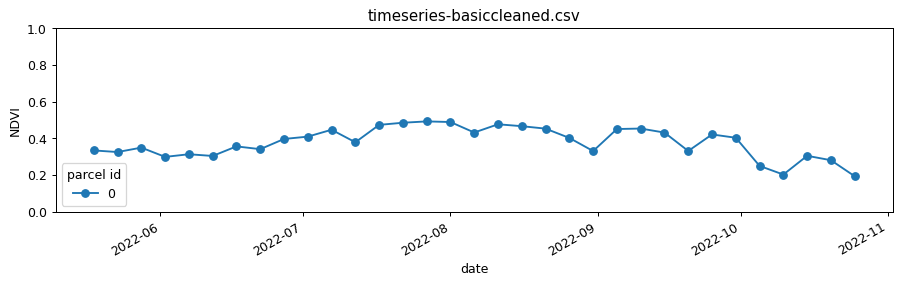

In [ ]:
plot_timeseries("gndvi-results/timeseries-basiccleaned.csv")

## Rasterization for GNDVI

In [ ]:
df= pd.read_csv("coordinates.csv")
df


,Latitude,Longitude
0,31.097778,32.126892
1,31.069153,32.176819
2,31.037659,32.184753
3,30.937134,32.208740
4,30.934509,32.203674
...,...,...
105,31.077515,31.887085
106,31.088501,31.942993
107,31.110535,31.972717
108,31.113831,32.051208


In [ ]:
import pandas as pd

# Load the CSV file containing the NDVI time series
gndvi_df = pd.read_csv("gndvi-results/timeseries-basiccleaned.csv", index_col=0)

# Print the shape of the NDVI DataFrame
print("Shape of gndvi DataFrame:", gndvi_df.shape)

# Print the first few rows of the NDVI DataFrame
print("First few rows of gndvi DataFrame:")
print(gndvi_df.head())


Shape of gndvi DataFrame: (33, 4)
First few rows of gndvi DataFrame:
                          feature_index  avg(band_0)   Latitude  Longitude
date                                                                      
2022-05-23T00:00:00.000Z              0     0.326214  31.097778  32.126892
2022-06-27T00:00:00.000Z              0     0.397434  31.069153  32.176819
2022-07-02T00:00:00.000Z              0     0.410092  31.037659  32.184753
2022-07-17T00:00:00.000Z              0     0.474142  30.937134  32.208740
2022-08-06T00:00:00.000Z              0     0.432516  30.934509  32.203674


In [ ]:
import pandas as pd

# Load the CSV file
file_path = "gndvi-results/timeseries-basiccleaned.csv"
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit(1)
except Exception as e:
    print(f"Error loading file: {e}")
    exit(1)

# Drop the 'feature_index' column
if 'feature_index' in df.columns:
    df.drop(columns=['feature_index'], inplace=True)
    print("Column 'feature_index' dropped successfully.")
else:
    print("Column 'feature_index' not found.")

# Save the modified DataFrame back to a CSV file
output_file_path = "gndvi-results/timeseries-basiccleaned_without_index.csv"
try:
    df.to_csv(output_file_path, index=False)
    print(f"Modified DataFrame saved to '{output_file_path}'.")
except Exception as e:
    print(f"Error saving file: {e}")


File loaded successfully.
Column 'feature_index' dropped successfully.
Modified DataFrame saved to 'gndvi-results/timeseries-basiccleaned_without_index.csv'.


In [ ]:
import pandas as pd
import numpy as np
import rasterio
from rasterio.transform import from_origin
from scipy.interpolate import interp2d

# Load combined CSV file
combined_df = pd.read_csv("gndvi-results/timeseries-basiccleaned_without_index.csv")

# Shapefile bounds
shapefile_bounds = [31.267578125,0.18780517578125,32.208740234375,31.11383056640625]

# Update raster bounds
xmin = shapefile_bounds[0]  # Minimum X coordinate
ymin = shapefile_bounds[1]  # Minimum Y coordinate
xmax = shapefile_bounds[2]  # Maximum X coordinate
ymax = shapefile_bounds[3]  # Maximum Y coordinate

# Define resolution and buffer for raster bounds adjustment
resolution = 0.01  # Resolution in degrees
buffer = 0.1       # Buffer to extend raster bounds beyond data extent

# Adjust raster bounds with buffer
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

# Calculate raster dimensions
width = 91
height = 101

# Filter data points within raster bounds
filtered_df = combined_df[(combined_df['Latitude'] >= ymin) & (combined_df['Latitude'] <= ymax) &
                          (combined_df['Longitude'] >= xmin) & (combined_df['Longitude'] <= xmax)]

# Extract latitude, longitude, and NDVI values from filtered data
latitude = filtered_df['Latitude'].values
longitude = filtered_df['Longitude'].values
gndvi = filtered_df['avg(band_0)'].values

# Create interpolation function
f = interp2d(longitude, latitude, gndvi, kind='linear')

# Generate grid of coordinates for raster
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)

# Interpolate moisture values for raster grid
gndvi_grid = f(x, y)

# Create raster image
with rasterio.open(
    'raster_output4.tif',
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=np.float64,
    crs='EPSG:32636',
    transform=from_origin(xmin, ymax, resolution, resolution),
) as dst:
    dst.write(gndvi_grid, 1)


<ipython-input-171-4c1e8d94f74b>:43: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(longitude, latitude, gndvi, kind='linear')
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,8 m=33 fp=0.038553 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
<ipython-i

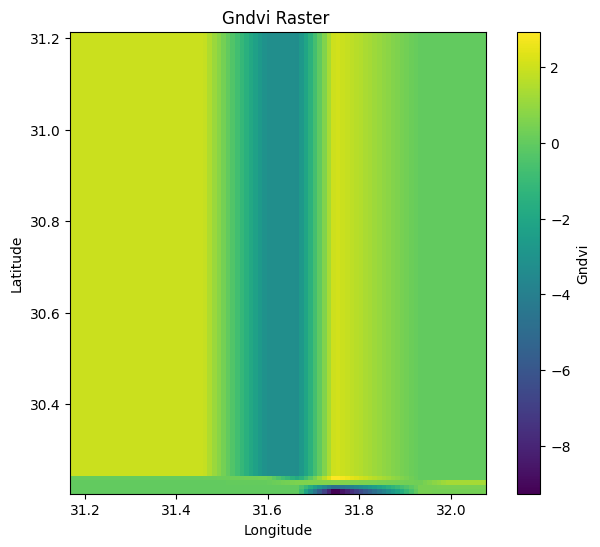

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open("raster_output4.tif") as src:
    # Read the raster data
    raster_data = src.read(1)

    # Plot the raster data
    plt.figure(figsize=(8, 6))
    plt.imshow(raster_data, cmap='viridis', extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])
    plt.colorbar(label='Gndvi')
    plt.title('Gndvi Raster ')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [ ]:
from google.colab import files

# Replace 'raster_output1.tif' with the path to your file if it's in a different directory
files.download('raster_output4.tif')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Info about raster image For GNDVI:

In [ ]:
import rasterio

# Open the raster file in read mode
with rasterio.open('raster_output4.tif', 'r') as src:
    # Get basic information about the raster
    print("Raster Information:")
    print("Dimensions (width, height):", src.width, "x", src.height)
    print("Number of bands:", src.count)
    print("Data type:", src.dtypes[0])
    print("Coordinate Reference System (CRS):", src.crs)

    # Get geospatial information
    transform = src.transform
    print("\nGeospatial Information:")
    print("Transform (Affine matrix):", transform)
    print("Resolution (pixel size):", transform.a, "x", transform.e)
    print("Bounding Box (minx, miny, maxx, maxy):", src.bounds)

    # Get statistics of the raster data
    for i in range(1, src.count + 1):
        band = src.read(i)
        print("\nStatistics for Band", i, ":")
        print("Minimum value:", band.min())
        print("Maximum value:", band.max())
        print("Mean value:", band.mean())
        print("Standard deviation:", band.std())




Raster Information:
Dimensions (width, height): 91 x 101
Number of bands: 1
Data type: float64
Coordinate Reference System (CRS): EPSG:32636

Geospatial Information:
Transform (Affine matrix): | 0.01, 0.00, 31.17|
| 0.00,-0.01, 31.21|
| 0.00, 0.00, 1.00|
Resolution (pixel size): 0.01 x -0.01
Bounding Box (minx, miny, maxx, maxy): BoundingBox(left=31.167578125, bottom=30.20383056640625, right=32.077578124999995, top=31.21383056640625)

Statistics for Band 1 :
Minimum value: -9.273065640013169
Maximum value: 2.9391665419663147
Mean value: 0.43932740773066215
Standard deviation: 1.6714152638078619


##Calculating EVI (Feature 5)(YEAR 2020) with bands 3 , 8 and blue"RICE"

In [ ]:
fields = json.loads(
    """{
    "type": "FeatureCollection",
    "features": [
       {"type": "Feature", "properties": {}, "geometry":{"type":"Polygon","coordinates":[[[32.12689208984375,31.0977783203125],[32.17681884765625,31.06915283203125],[32.18475341796875,31.03765869140625],[32.208740234375,30.9371337890625],[32.20367431640625,30.93450927734375],[32.181365966796875,30.921539306640625],[32.17816162109375,30.89752197265625],[32.16253662109375,30.73321533203125],[32.15948486328125,30.6815185546875],[32.15924072265625,30.677978515625],[32.17486572265625,30.6258544921875],[32.11962890625,30.60650634765625],[32.10906982421875,30.595947265625],[32.1278076171875,30.56268310546875],[32.07037353515625,30.5548095703125],[32.0655517578125,30.5633544921875],[32.00830078125,30.571044921875],[31.97662353515625,30.575439453125],[31.865966796875,30.555419921875],[31.7716064453125,30.5732421875],[31.752685546875,30.55810546875],[31.75689697265625,30.52593994140625],[31.76568603515625,30.51824951171875],[31.3798828125,30.811431884765625],[31.40484619140625,30.81195068359375],[31.41278076171875,30.802734375],[31.4315185546875,30.811279296875],[31.43280029296875,30.81793212890625],[31.4332275390625,30.82073974609375],[31.4625244140625,30.82537841796875],[31.48516845703125,30.81109619140625]]]}}


    ]}
"""
)

In [ ]:
s2cube = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-05-15", "2022-10-30"],
    bands=["B04", "B08","B03"],
)

In [ ]:
red = s2cube.band("B04")
nir = s2cube.band("B08")
blue = s2cube.band("B03")
c1=6
c2=7.5
l=1
evi = 2.5 * ((nir - red) / (nir + c1 * red - c2 * blue + l))

In [ ]:
timeseries = evi.aggregate_spatial(geometries=fields, reducer="mean")

In [ ]:
job = timeseries.execute_batch(out_format="CSV", title="evi timeseries")

0:00:00 Job 'j-240517afe19c4d599100d449ed9bb65f': send 'start'
0:00:17 Job 'j-240517afe19c4d599100d449ed9bb65f': created (progress 0%)
0:00:23 Job 'j-240517afe19c4d599100d449ed9bb65f': created (progress 0%)
0:00:30 Job 'j-240517afe19c4d599100d449ed9bb65f': created (progress 0%)
0:00:40 Job 'j-240517afe19c4d599100d449ed9bb65f': created (progress 0%)
0:00:54 Job 'j-240517afe19c4d599100d449ed9bb65f': created (progress 0%)
0:01:07 Job 'j-240517afe19c4d599100d449ed9bb65f': created (progress 0%)
0:01:23 Job 'j-240517afe19c4d599100d449ed9bb65f': created (progress 0%)
0:01:43 Job 'j-240517afe19c4d599100d449ed9bb65f': created (progress 0%)
0:02:08 Job 'j-240517afe19c4d599100d449ed9bb65f': created (progress 0%)
0:02:38 Job 'j-240517afe19c4d599100d449ed9bb65f': running (progress N/A)
0:03:16 Job 'j-240517afe19c4d599100d449ed9bb65f': running (progress N/A)
0:04:03 Job 'j-240517afe19c4d599100d449ed9bb65f': running (progress N/A)
0:05:07 Job 'j-240517afe19c4d599100d449ed9bb65f': running (progress N/

In [ ]:
job.get_results().download_file("evi-results/timeseries-basic.csv")
pd.read_csv("evi-results/timeseries-basic.csv", index_col=0).head()

,feature_index,avg(band_0)
date,,
2022-05-23T00:00:00.000Z,0,1.419109
2022-06-07T00:00:00.000Z,0,1.546323
2022-06-02T00:00:00.000Z,0,1.481865
2022-06-22T00:00:00.000Z,0,1.913676
2022-07-02T00:00:00.000Z,0,2.964244


In [ ]:
def plot_timeseries(filename, figsize=(10, 3)):
    df = pd.read_csv(filename, index_col=0)
    df.index = pd.to_datetime(df.index)

    fig, ax = plt.subplots(figsize=figsize, dpi=90)
    df.groupby("feature_index")["avg(band_0)"].plot(marker="o", ax=ax)
    ax.set_title(filename.split("/")[-1])
    ax.set_ylabel("EVI")
    ax.set_ylim(0, 1)
    ax.legend(title="parcel id", loc="lower left", ncol=2)

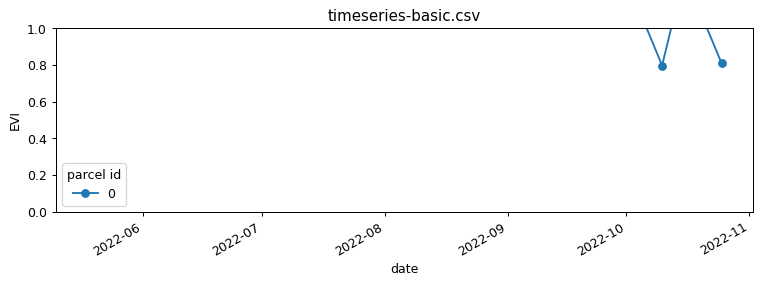

In [ ]:
plot_timeseries("evi-results/timeseries-basic.csv")

In [ ]:
# merge the dataset in same file of ndvi

# Load latitude and longitude data
coordinates_data = pd.read_csv("coordinates.csv")

# Load NDVI time series data
evi_data = pd.read_csv("evi-results/timeseries-basic.csv")

# Add latitude and longitude columns to ndvi_data
evi_data["Latitude"] = coordinates_data["Latitude"]
evi_data["Longitude"] = coordinates_data["Longitude"]




In [ ]:
evi_data.shape

(33, 5)

In [ ]:

evi_data.head(12)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,1.419109,31.097778,32.126892
1,2022-06-07T00:00:00.000Z,0,1.546323,31.069153,32.176819
2,2022-06-02T00:00:00.000Z,0,1.481865,31.037659,32.184753
3,2022-06-22T00:00:00.000Z,0,1.913676,30.937134,32.208740
4,2022-07-02T00:00:00.000Z,0,2.964244,30.934509,32.203674
5,2022-06-27T00:00:00.000Z,0,2.568204,30.921539,32.181366
6,2022-07-22T00:00:00.000Z,0,3.685286,30.897522,32.178162
7,2022-08-01T00:00:00.000Z,0,3.648001,30.733215,32.162537
8,2022-08-11T00:00:00.000Z,0,3.403905,30.681519,32.159485
9,2022-09-05T00:00:00.000Z,0,2.816685,30.677979,32.159241


In [ ]:
evi_data_cleaned = evi_data.dropna()

In [ ]:
# ndvi_data.shape
evi_data_cleaned.shape

(33, 5)

In [ ]:
evi_data_cleaned.to_csv("evi-results/timeseries-basiccleaned.csv", index=False)

In [ ]:
evi_data_cleaned.head(18)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,1.419109,31.097778,32.126892
1,2022-06-07T00:00:00.000Z,0,1.546323,31.069153,32.176819
2,2022-06-02T00:00:00.000Z,0,1.481865,31.037659,32.184753
3,2022-06-22T00:00:00.000Z,0,1.913676,30.937134,32.208740
4,2022-07-02T00:00:00.000Z,0,2.964244,30.934509,32.203674
5,2022-06-27T00:00:00.000Z,0,2.568204,30.921539,32.181366
6,2022-07-22T00:00:00.000Z,0,3.685286,30.897522,32.178162
7,2022-08-01T00:00:00.000Z,0,3.648001,30.733215,32.162537
8,2022-08-11T00:00:00.000Z,0,3.403905,30.681519,32.159485
9,2022-09-05T00:00:00.000Z,0,2.816685,30.677979,32.159241


In [ ]:
evi_csv = pd.read_csv("evi-results/timeseries-basiccleaned.csv")
evi_csv.head(15)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,1.419109,31.097778,32.126892
1,2022-06-07T00:00:00.000Z,0,1.546323,31.069153,32.176819
2,2022-06-02T00:00:00.000Z,0,1.481865,31.037659,32.184753
3,2022-06-22T00:00:00.000Z,0,1.913676,30.937134,32.208740
4,2022-07-02T00:00:00.000Z,0,2.964244,30.934509,32.203674
5,2022-06-27T00:00:00.000Z,0,2.568204,30.921539,32.181366
6,2022-07-22T00:00:00.000Z,0,3.685286,30.897522,32.178162
7,2022-08-01T00:00:00.000Z,0,3.648001,30.733215,32.162537
8,2022-08-11T00:00:00.000Z,0,3.403905,30.681519,32.159485
9,2022-09-05T00:00:00.000Z,0,2.816685,30.677979,32.159241


In [ ]:
def plot_timeseries(filename, figsize=(10, 3)):
    df = pd.read_csv(filename, index_col=0)
    df.index = pd.to_datetime(df.index)

    fig, ax = plt.subplots(figsize=figsize, dpi=90)
    df.groupby("feature_index")["avg(band_0)"].plot(marker="o", ax=ax)
    ax.set_title(filename.split("/")[-1])
    ax.set_ylabel("EVI")
    ax.set_ylim(0, 1)
    ax.legend(title="parcel id", loc="lower left", ncol=2)

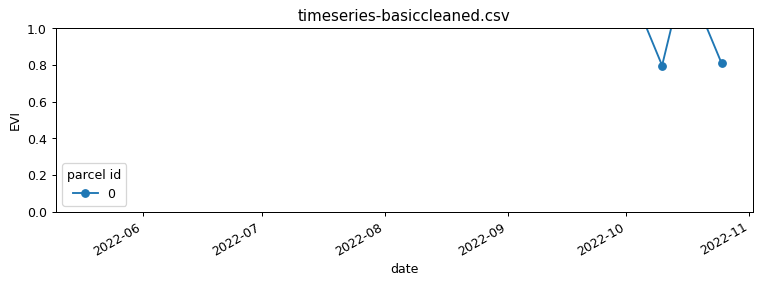

In [ ]:
plot_timeseries("evi-results/timeseries-basiccleaned.csv")

## Rasterization for EVI

In [ ]:
df= pd.read_csv("coordinates.csv")
df


,Latitude,Longitude
0,31.097778,32.126892
1,31.069153,32.176819
2,31.037659,32.184753
3,30.937134,32.208740
4,30.934509,32.203674
...,...,...
105,31.077515,31.887085
106,31.088501,31.942993
107,31.110535,31.972717
108,31.113831,32.051208


In [ ]:
import pandas as pd

# Load the CSV file containing the NDVI time series
evi_df = pd.read_csv("evi-results/timeseries-basiccleaned.csv", index_col=0)

# Print the shape of the NDVI DataFrame
print("Shape of evi DataFrame:", evi_df.shape)

# Print the first few rows of the NDVI DataFrame
print("First few rows of evi DataFrame:")
print(evi_df.head())


Shape of evi DataFrame: (33, 4)
First few rows of evi DataFrame:
                          feature_index  avg(band_0)   Latitude  Longitude
date                                                                      
2022-05-23T00:00:00.000Z              0     1.419109  31.097778  32.126892
2022-06-07T00:00:00.000Z              0     1.546323  31.069153  32.176819
2022-06-02T00:00:00.000Z              0     1.481865  31.037659  32.184753
2022-06-22T00:00:00.000Z              0     1.913676  30.937134  32.208740
2022-07-02T00:00:00.000Z              0     2.964244  30.934509  32.203674


In [ ]:
import pandas as pd

# Load the CSV file
file_path = "evi-results/timeseries-basiccleaned.csv"
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit(1)
except Exception as e:
    print(f"Error loading file: {e}")
    exit(1)

# Drop the 'feature_index' column
if 'feature_index' in df.columns:
    df.drop(columns=['feature_index'], inplace=True)
    print("Column 'feature_index' dropped successfully.")
else:
    print("Column 'feature_index' not found.")

# Save the modified DataFrame back to a CSV file
output_file_path = "evi-results/timeseries-basiccleaned_without_index.csv"
try:
    df.to_csv(output_file_path, index=False)
    print(f"Modified DataFrame saved to '{output_file_path}'.")
except Exception as e:
    print(f"Error saving file: {e}")


File loaded successfully.
Column 'feature_index' dropped successfully.
Modified DataFrame saved to 'evi-results/timeseries-basiccleaned_without_index.csv'.


In [ ]:
import pandas as pd
import numpy as np
import rasterio
from rasterio.transform import from_origin
from scipy.interpolate import interp2d

# Load combined CSV file
combined_df = pd.read_csv("evi-results/timeseries-basiccleaned_without_index.csv")

# Shapefile bounds
shapefile_bounds = [31.267578125,0.18780517578125,32.208740234375,31.11383056640625]

# Update raster bounds
xmin = shapefile_bounds[0]  # Minimum X coordinate
ymin = shapefile_bounds[1]  # Minimum Y coordinate
xmax = shapefile_bounds[2]  # Maximum X coordinate
ymax = shapefile_bounds[3]  # Maximum Y coordinate

# Define resolution and buffer for raster bounds adjustment
resolution = 0.01  # Resolution in degrees
buffer = 0.1       # Buffer to extend raster bounds beyond data extent

# Adjust raster bounds with buffer
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

# Calculate raster dimensions
width = 91
height = 101

# Filter data points within raster bounds
filtered_df = combined_df[(combined_df['Latitude'] >= ymin) & (combined_df['Latitude'] <= ymax) &
                          (combined_df['Longitude'] >= xmin) & (combined_df['Longitude'] <= xmax)]

# Extract latitude, longitude, and NDVI values from filtered data
latitude = filtered_df['Latitude'].values
longitude = filtered_df['Longitude'].values
evi = filtered_df['avg(band_0)'].values

# Create interpolation function
f = interp2d(longitude, latitude, evi, kind='linear')

# Generate grid of coordinates for raster
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)

# Interpolate moisture values for raster grid
evi_grid = f(x, y)

# Create raster image
with rasterio.open(
    'raster_output5.tif',
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=np.float64,
    crs='EPSG:32636',
    transform=from_origin(xmin, ymax, resolution, resolution),
) as dst:
    dst.write(evi_grid, 1)


<ipython-input-196-cbf2af667d4c>:43: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(longitude, latitude, evi, kind='linear')
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=8,8 m=33 fp=2.492471 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
<ipython-inp

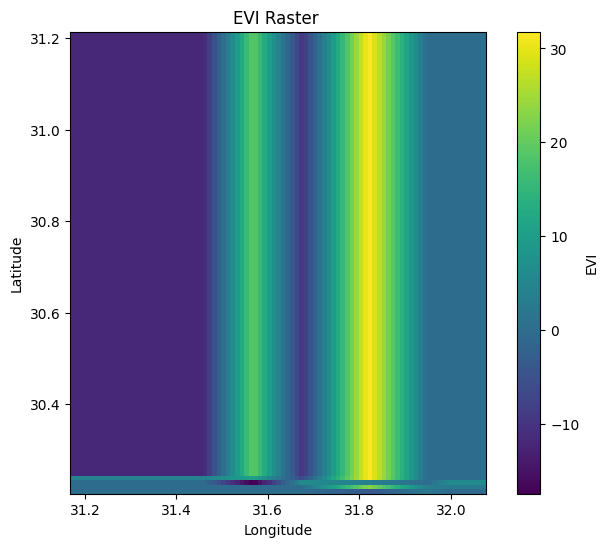

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open("raster_output5.tif") as src:
    # Read the raster data
    raster_data = src.read(1)

    # Plot the raster data
    plt.figure(figsize=(8, 6))
    plt.imshow(raster_data, cmap='viridis', extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])
    plt.colorbar(label='EVI')
    plt.title('EVI Raster ')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [ ]:
from google.colab import files

# Replace 'raster_output1.tif' with the path to your file if it's in a different directory
files.download('raster_output5.tif')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Info about raster image for EVI:

In [ ]:
import rasterio

# Open the raster file in read mode
with rasterio.open('raster_output5.tif', 'r') as src:
    # Get basic information about the raster
    print("Raster Information:")
    print("Dimensions (width, height):", src.width, "x", src.height)
    print("Number of bands:", src.count)
    print("Data type:", src.dtypes[0])
    print("Coordinate Reference System (CRS):", src.crs)

    # Get geospatial information
    transform = src.transform
    print("\nGeospatial Information:")
    print("Transform (Affine matrix):", transform)
    print("Resolution (pixel size):", transform.a, "x", transform.e)
    print("Bounding Box (minx, miny, maxx, maxy):", src.bounds)

    # Get statistics of the raster data
    for i in range(1, src.count + 1):
        band = src.read(i)
        print("\nStatistics for Band", i, ":")
        print("Minimum value:", band.min())
        print("Maximum value:", band.max())
        print("Mean value:", band.mean())
        print("Standard deviation:", band.std())




Raster Information:
Dimensions (width, height): 91 x 101
Number of bands: 1
Data type: float64
Coordinate Reference System (CRS): EPSG:32636

Geospatial Information:
Transform (Affine matrix): | 0.01, 0.00, 31.17|
| 0.00,-0.01, 31.21|
| 0.00, 0.00, 1.00|
Resolution (pixel size): 0.01 x -0.01
Bounding Box (minx, miny, maxx, maxy): BoundingBox(left=31.167578125, bottom=30.20383056640625, right=32.077578124999995, top=31.21383056640625)

Statistics for Band 1 :
Minimum value: -17.42780639066828
Maximum value: 31.78571406093512
Mean value: 1.361912866015231
Standard deviation: 12.457429192000877


##Calculating Moisture index (Feature 6)(YEAR 2020) with bands 8A , 11 "narrow nir & swir""RICE"

In [ ]:
fields = json.loads(
    """{
    "type": "FeatureCollection",
    "features": [
       {"type": "Feature", "properties": {}, "geometry":{"type":"Polygon","coordinates":[[[32.12689208984375,31.0977783203125],[32.17681884765625,31.06915283203125],[32.18475341796875,31.03765869140625],[32.208740234375,30.9371337890625],[32.20367431640625,30.93450927734375],[32.181365966796875,30.921539306640625],[32.17816162109375,30.89752197265625],[32.16253662109375,30.73321533203125],[32.15948486328125,30.6815185546875],[32.15924072265625,30.677978515625],[32.17486572265625,30.6258544921875],[32.11962890625,30.60650634765625],[32.10906982421875,30.595947265625],[32.1278076171875,30.56268310546875],[32.07037353515625,30.5548095703125],[32.0655517578125,30.5633544921875],[32.00830078125,30.571044921875],[31.97662353515625,30.575439453125],[31.865966796875,30.555419921875],[31.7716064453125,30.5732421875],[31.752685546875,30.55810546875],[31.75689697265625,30.52593994140625],[31.76568603515625,30.51824951171875],[31.3798828125,30.811431884765625],[31.40484619140625,30.81195068359375],[31.41278076171875,30.802734375],[31.4315185546875,30.811279296875],[31.43280029296875,30.81793212890625],[31.4332275390625,30.82073974609375],[31.4625244140625,30.82537841796875],[31.48516845703125,30.81109619140625]]]}}


    ]}
"""
)

In [ ]:
s2cube = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=["2022-05-15", "2023-10-30"],
    bands=["B8A", "B11"],
)

In [ ]:
narrow = s2cube.band("B8A")
swir = s2cube.band("B11")
moisture = (narrow - swir) / (narrow + swir)

In [ ]:
timeseries = moisture.aggregate_spatial(geometries=fields, reducer="mean")

In [ ]:
job = timeseries.execute_batch(out_format="CSV", title="MOISTURE timeseries")

0:00:00 Job 'j-2405176a730249a5a20653c9ae35d5d9': send 'start'
0:00:22 Job 'j-2405176a730249a5a20653c9ae35d5d9': created (progress 0%)
0:00:28 Job 'j-2405176a730249a5a20653c9ae35d5d9': created (progress 0%)
0:00:34 Job 'j-2405176a730249a5a20653c9ae35d5d9': created (progress 0%)
0:00:43 Job 'j-2405176a730249a5a20653c9ae35d5d9': created (progress 0%)
0:00:53 Job 'j-2405176a730249a5a20653c9ae35d5d9': created (progress 0%)
0:01:14 Job 'j-2405176a730249a5a20653c9ae35d5d9': running (progress N/A)
0:01:30 Job 'j-2405176a730249a5a20653c9ae35d5d9': running (progress N/A)
0:01:51 Job 'j-2405176a730249a5a20653c9ae35d5d9': running (progress N/A)
0:02:21 Job 'j-2405176a730249a5a20653c9ae35d5d9': running (progress N/A)
0:02:52 Job 'j-2405176a730249a5a20653c9ae35d5d9': running (progress N/A)
0:03:31 Job 'j-2405176a730249a5a20653c9ae35d5d9': running (progress N/A)
0:04:18 Job 'j-2405176a730249a5a20653c9ae35d5d9': running (progress N/A)
0:05:17 Job 'j-2405176a730249a5a20653c9ae35d5d9': running (progres

In [ ]:
job.get_results().download_file("moisture-results/timeseries-basic.csv")  #merge coordinates

PosixPath('moisture-results/timeseries-basic.csv')

In [ ]:

pd.read_csv("moisture-results/timeseries-basic.csv", index_col=0).head()

,feature_index,avg(band_0)
date,,
2022-05-18T00:00:00.000Z,0,0.035037
2022-05-23T00:00:00.000Z,0,0.033133
2022-05-28T00:00:00.000Z,0,0.020352
2022-06-12T00:00:00.000Z,0,0.056365
2022-06-17T00:00:00.000Z,0,0.059524


In [ ]:
def plot_timeseries(filename, figsize=(12, 3)):
    df = pd.read_csv(filename, index_col=0)
    df.index = pd.to_datetime(df.index)

    fig, ax = plt.subplots(figsize=figsize, dpi=90)
    df.groupby("feature_index")["avg(band_0)"].plot(marker="o", ax=ax)
    ax.set_title(filename.split("/")[-1])
    ax.set_ylabel("mosture")
    ax.set_ylim(0, 1)
    ax.legend(title="parcel id", loc="lower left", ncol=2)

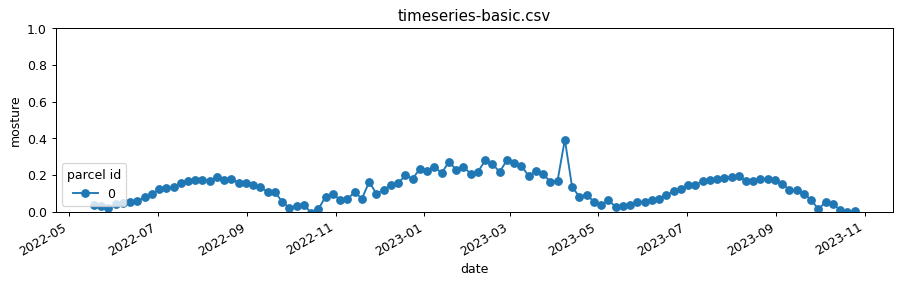

In [ ]:
plot_timeseries("moisture-results/timeseries-basic.csv")

In [ ]:
# merge the dataset in same file of ndvi

# Load latitude and longitude data
coordinates_data = pd.read_csv("coordinates.csv")

# Load NDVI time series data
moisture_data = pd.read_csv("moisture-results/timeseries-basic.csv")

# Add latitude and longitude columns to ndvi_data
moisture_data["Latitude"] = coordinates_data["Latitude"]
moisture_data["Longitude"] = coordinates_data["Longitude"]




In [ ]:
moisture_data.shape

(106, 5)

In [ ]:

moisture_data.head(12)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-18T00:00:00.000Z,0,0.035037,31.097778,32.126892
1,2022-05-23T00:00:00.000Z,0,0.033133,31.069153,32.176819
2,2022-05-28T00:00:00.000Z,0,0.020352,31.037659,32.184753
3,2022-06-12T00:00:00.000Z,0,0.056365,30.937134,32.208740
4,2022-06-17T00:00:00.000Z,0,0.059524,30.934509,32.203674
5,2022-07-07T00:00:00.000Z,0,0.132411,30.921539,32.181366
6,2022-07-22T00:00:00.000Z,0,0.170199,30.897522,32.178162
7,2022-07-27T00:00:00.000Z,0,0.174932,30.733215,32.162537
8,2022-08-06T00:00:00.000Z,0,0.168572,30.681519,32.159485
9,2022-08-21T00:00:00.000Z,0,0.180232,30.677979,32.159241


In [ ]:
moisture_data_cleaned = ndvi_data.dropna()

In [ ]:
# ndvi_data.shape
moisture_data_cleaned.shape

(106, 5)

In [ ]:
moisture_data_cleaned.to_csv("moisture-results/timeseries-basiccleaned.csv", index=False)

In [ ]:
moisture_data_cleaned.head(18)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,0.254016,31.097778,32.126892
1,2022-06-02T00:00:00.000Z,0,0.243558,31.069153,32.176819
2,2022-06-07T00:00:00.000Z,0,0.254284,31.037659,32.184753
3,2022-06-12T00:00:00.000Z,0,0.255517,30.937134,32.208740
4,2022-06-22T00:00:00.000Z,0,0.309491,30.934509,32.203674
5,2022-05-28T00:00:00.000Z,0,0.266899,30.921539,32.181366
6,2022-06-17T00:00:00.000Z,0,0.309025,30.897522,32.178162
7,2022-07-02T00:00:00.000Z,0,0.399450,30.733215,32.162537
8,2022-07-17T00:00:00.000Z,0,0.474107,30.681519,32.159485
9,2022-07-22T00:00:00.000Z,0,0.493181,30.677979,32.159241


In [ ]:
moisture_csv = pd.read_csv("moisture-results/timeseries-basiccleaned.csv")
moisture_csv.head(15)

,date,feature_index,avg(band_0),Latitude,Longitude
0,2022-05-23T00:00:00.000Z,0,0.254016,31.097778,32.126892
1,2022-06-02T00:00:00.000Z,0,0.243558,31.069153,32.176819
2,2022-06-07T00:00:00.000Z,0,0.254284,31.037659,32.184753
3,2022-06-12T00:00:00.000Z,0,0.255517,30.937134,32.208740
4,2022-06-22T00:00:00.000Z,0,0.309491,30.934509,32.203674
5,2022-05-28T00:00:00.000Z,0,0.266899,30.921539,32.181366
6,2022-06-17T00:00:00.000Z,0,0.309025,30.897522,32.178162
7,2022-07-02T00:00:00.000Z,0,0.399450,30.733215,32.162537
8,2022-07-17T00:00:00.000Z,0,0.474107,30.681519,32.159485
9,2022-07-22T00:00:00.000Z,0,0.493181,30.677979,32.159241


In [ ]:
def plot_timeseries(filename, figsize=(12, 3)):
    df = pd.read_csv(filename, index_col=0)
    df.index = pd.to_datetime(df.index)

    fig, ax = plt.subplots(figsize=figsize, dpi=90)
    df.groupby("feature_index")["avg(band_0)"].plot(marker="o", ax=ax)
    ax.set_title(filename.split("/")[-1])
    ax.set_ylabel("mosture")
    ax.set_ylim(0, 1)
    ax.legend(title="parcel id", loc="lower left", ncol=2)

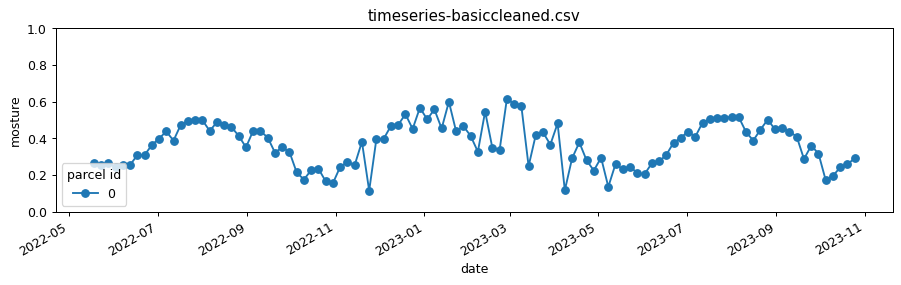

In [ ]:
plot_timeseries("moisture-results/timeseries-basiccleaned.csv")

## Rasterizaton for moisture

In [ ]:
df= pd.read_csv("coordinates.csv")
df


,Latitude,Longitude
0,31.097778,32.126892
1,31.069153,32.176819
2,31.037659,32.184753
3,30.937134,32.208740
4,30.934509,32.203674
...,...,...
105,31.077515,31.887085
106,31.088501,31.942993
107,31.110535,31.972717
108,31.113831,32.051208


In [ ]:
import pandas as pd

# Load the CSV file containing the NDVI time series
moisture_df = pd.read_csv("moisture-results/timeseries-basiccleaned.csv", index_col=0)

# Print the shape of the NDVI DataFrame
print("Shape of moisture DataFrame:", moisture_df.shape)

# Print the first few rows of the NDVI DataFrame
print("First few rows of moisture DataFrame:")
print(moisture_df.head())


Shape of moisture DataFrame: (106, 4)
First few rows of moisture DataFrame:
                          feature_index  avg(band_0)   Latitude  Longitude
date                                                                      
2022-05-23T00:00:00.000Z              0     0.254016  31.097778  32.126892
2022-06-02T00:00:00.000Z              0     0.243558  31.069153  32.176819
2022-06-07T00:00:00.000Z              0     0.254284  31.037659  32.184753
2022-06-12T00:00:00.000Z              0     0.255517  30.937134  32.208740
2022-06-22T00:00:00.000Z              0     0.309491  30.934509  32.203674


In [ ]:
import pandas as pd

# Load the CSV file
file_path = "moisture-results/timeseries-basiccleaned.csv"
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
    exit(1)
except Exception as e:
    print(f"Error loading file: {e}")
    exit(1)

# Drop the 'feature_index' column
if 'feature_index' in df.columns:
    df.drop(columns=['feature_index'], inplace=True)
    print("Column 'feature_index' dropped successfully.")
else:
    print("Column 'feature_index' not found.")

# Save the modified DataFrame back to a CSV file
output_file_path = "moisture-results/timeseries-basiccleaned_without_index.csv"
try:
    df.to_csv(output_file_path, index=False)
    print(f"Modified DataFrame saved to '{output_file_path}'.")
except Exception as e:
    print(f"Error saving file: {e}")


File loaded successfully.
Column 'feature_index' dropped successfully.
Modified DataFrame saved to 'moisture-results/timeseries-basiccleaned_without_index.csv'.


In [ ]:
import pandas as pd

# Read the CSV file
csv_file = "moisture-results/timeseries-basiccleaned_without_index.csv"
df = pd.read_csv(csv_file)

# Convert the 'date' column to datetime and make it timezone-aware with a default timezone
df['date'] = pd.to_datetime(df['date'], utc=True)

# Define the reference date
reference_date = pd.Timestamp('2022-01-01', tz='UTC')

# Calculate the numeric representation of the datetime
df['date_numeric'] = (df['date'] - reference_date).dt.days

# Display the DataFrame with the new numeric datetime column
print(df.head())


                       date  avg(band_0)   Latitude  Longitude  date_numeric
0 2022-05-23 00:00:00+00:00     0.254016  31.097778  32.126892           142
1 2022-06-02 00:00:00+00:00     0.243558  31.069153  32.176819           152
2 2022-06-07 00:00:00+00:00     0.254284  31.037659  32.184753           157
3 2022-06-12 00:00:00+00:00     0.255517  30.937134  32.208740           162
4 2022-06-22 00:00:00+00:00     0.309491  30.934509  32.203674           172


In [ ]:
import pandas as pd
import numpy as np
import rasterio
from rasterio.transform import from_origin
from scipy.interpolate import interp2d

# Load combined CSV file
combined_df = pd.read_csv("moisture-results/timeseries-basiccleaned.csv")

# Shapefile bounds
shapefile_bounds = [31.267578125,0.18780517578125,32.208740234375,31.11383056640625]

# Update raster bounds
xmin = shapefile_bounds[0]  # Minimum X coordinate
ymin = shapefile_bounds[1]  # Minimum Y coordinate
xmax = shapefile_bounds[2]  # Maximum X coordinate
ymax = shapefile_bounds[3]  # Maximum Y coordinate

# Define resolution and buffer for raster bounds adjustment
resolution = 0.01  # Resolution in degrees
buffer = 0.1       # Buffer to extend raster bounds beyond data extent

# Adjust raster bounds with buffer
xmin -= buffer
ymin -= buffer
xmax += buffer
ymax += buffer

# Calculate raster dimensions
width = 91
height = 101

# Filter data points within raster bounds
filtered_df = combined_df[(combined_df['Latitude'] >= ymin) & (combined_df['Latitude'] <= ymax) &
                          (combined_df['Longitude'] >= xmin) & (combined_df['Longitude'] <= xmax)]

# Extract latitude, longitude, and NDVI values from filtered data
latitude = filtered_df['Latitude'].values
longitude = filtered_df['Longitude'].values
moisture = filtered_df['avg(band_0)'].values

# Create interpolation function
f = interp2d(longitude, latitude, moisture, kind='linear')

# Generate grid of coordinates for raster
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)

# Interpolate moisture values for raster grid
moisture_grid = f(x, y)

# Create raster image
with rasterio.open(
    'raster_output6.tif',
    'w',
    driver='GTiff',
    height=height,
    width=width,
    count=1,
    dtype=np.float64,
    crs='EPSG:32636',
    transform=from_origin(xmin, ymax, resolution, resolution),
) as dst:
    dst.write(moisture_grid, 1)


<ipython-input-223-4de15880aaba>:43: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interp2d(longitude, latitude, moisture, kind='linear')
/usr/local/lib/python3.10/dist-packages/scipy/interpolate/_fitpack_impl.py:593: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=14,11 m=106 fp=0.170418 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
<ipy

In [ ]:
import rasterio

# Open the raster file
with rasterio.open('raster_output6.tif') as src:
    # Read the raster data as a numpy array
    raster_matrix = src.read(1)  # Assuming you want to read the first band

# Now you can access the raster_matrix, which contains the pixel values
# For example, you can print the dimensions of the matrix
print("Dimensions of the raster matrix:", raster_matrix.shape)

# You can also print the entire matrix if needed
print("Raster matrix:")
print(raster_matrix)


Dimensions of the raster matrix: (101, 91)
Raster matrix:
[[12.41892165 12.41892165 12.41892165 ... -2.51655679 -2.51655679
  -2.51655679]
 [12.41892165 12.41892165 12.41892165 ... -2.51655679 -2.51655679
  -2.51655679]
 [12.41892165 12.41892165 12.41892165 ... -2.51655679 -2.51655679
  -2.51655679]
 ...
 [ 0.74187198  0.74187198  0.74187198 ...  0.51839158  0.51839158
   0.51839158]
 [ 0.          0.          0.         ...  0.29018468  0.29018468
   0.29018468]
 [ 0.          0.          0.         ...  0.22124948  0.22124948
   0.22124948]]


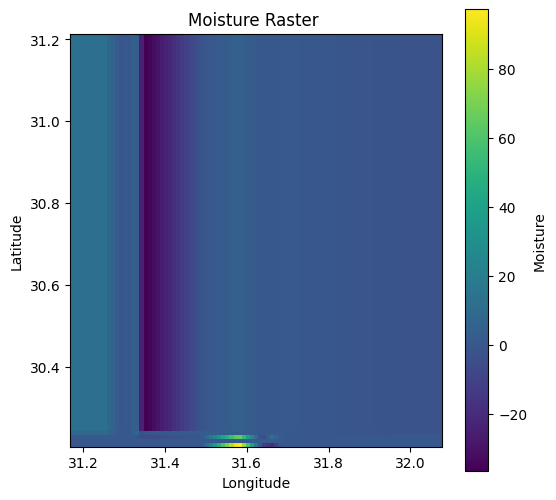

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Open the GeoTIFF file
with rasterio.open("raster_output6.tif") as src:
    # Read the raster data
    raster_data = src.read(1)

    # Plot the raster data
    plt.figure(figsize=(6, 6))
    plt.imshow(raster_data, cmap='viridis', extent=[src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top])
    plt.colorbar(label='Moisture')
    plt.title('Moisture Raster ')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


In [ ]:
from google.colab import files

# Replace 'raster_output1.tif' with the path to your file if it's in a different directory
files.download('raster_output6.tif')


Error: Unable to load the image. Please check the file path or the image format.


## knowing the information for raster image after converting

In [ ]:
import rasterio

# Define the path to the raster file
raster_file = "raster_output6.tif"

# Open the raster file
with rasterio.open(raster_file) as src:
    # Print basic information about the raster file
    print("Raster Information:")
    print(f"Driver: {src.driver}")
    print(f"Dimensions: {src.width} x {src.height}")
    print(f"Number of Bands: {src.count}")
    print(f"Coordinate Reference System (CRS): {src.crs}")
    print(f"Transformation Affine Parameters: {src.transform}")
    print(f"Bounding Box: {src.bounds}")
    print(f"Data Types: {src.dtypes}")


Raster Information:
Driver: GTiff
Dimensions: 91 x 101
Number of Bands: 1
Coordinate Reference System (CRS): EPSG:32636
Transformation Affine Parameters: | 0.01, 0.00, 31.17|
| 0.00,-0.01, 31.21|
| 0.00, 0.00, 1.00|
Bounding Box: BoundingBox(left=31.167578125, bottom=30.20383056640625, right=32.077578124999995, top=31.21383056640625)
Data Types: ('float64',)


## Putting CNN algorithem :

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
import tifffile
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the autoencoder model
input_img = tf.keras.layers.Input(shape=(404, 364, 1))

# Encoder
encoder = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
encoder = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder)
encoder = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoder)
encoder = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoder)

# Decoder
decoder = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoder)
decoder = tf.keras.layers.UpSampling2D((2, 2))(decoder)
decoder = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(decoder)
decoder = tf.keras.layers.UpSampling2D((2, 2))(decoder)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoder)

# Autoencoder model
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Function to load and preprocess images
def load_and_preprocess_images(input_image_paths):
    images = []
    for path in input_image_paths:
        try:
            input_image = tifffile.imread(path)
            input_image = cv2.resize(input_image, (364, 404))[..., np.newaxis]
            input_image = input_image / 255.0  # Normalize pixel values to [0, 1]
            images.append(input_image)
            print(f"Image {path} loaded and preprocessed successfully.")
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    return np.array(images)

# # Data augmentation
# datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
#                              shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# Function to train the autoencoder
def train_autoencoder(input_image_paths):
    try:
        images = load_and_preprocess_images(input_image_paths)
        if len(images) == 0:
            print("No images loaded successfully. Exiting.")
            return

        datagen.fit(images)
        autoencoder.fit(datagen.flow(images, images, batch_size=1), steps_per_epoch=len(images), epochs=100)
        print("Autoencoder training completed.")
    except Exception as e:
        print(f"Error: {e}")

# List of input image paths
input_image_paths = ["raster_output1.tif", "raster_output2.tif", "raster_output3.tif",
                     "raster_output4.tif", "raster_output5.tif", "raster_output6.tif"]

# Train the autoencoder
train_autoencoder(input_image_paths)


Image raster_output1.tif loaded and preprocessed successfully.
Image raster_output2.tif loaded and preprocessed successfully.
Image raster_output3.tif loaded and preprocessed successfully.
Image raster_output4.tif loaded and preprocessed successfully.
Image raster_output5.tif loaded and preprocessed successfully.
Image raster_output6.tif loaded and preprocessed successfully.
Epoch 1/100
6/6 [==============================] - 9s 1s/step - loss: 0.2362
Epoch 2/100
6/6 [==============================] - 4s 714ms/step - loss: 0.1197
Epoch 3/100
6/6 [==============================] - 4s 708ms/step - loss: 0.0042
Epoch 4/100
6/6 [==============================] - 7s 1s/step - loss: 7.0492e-04
Epoch 5/100
6/6 [==============================] - 4s 726ms/step - loss: 6.8770e-04
Epoch 6/100
6/6 [==============================] - 4s 746ms/step - loss: 6.8726e-04
Epoch 7/100
6/6 [==============================] - 7s 1s/step - loss: 6.8717e-04
Epoch 8/100
6/6 [==============================] - 4s 7

Image raster_output1.tif loaded and preprocessed successfully.
Image raster_output2.tif loaded and preprocessed successfully.
Image raster_output3.tif loaded and preprocessed successfully.
Image raster_output4.tif loaded and preprocessed successfully.
Image raster_output5.tif loaded and preprocessed successfully.
Image raster_output6.tif loaded and preprocessed successfully.
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 3.8877e-05 - val_loss: 0.0020
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 3.8877e-05 - val_loss: 0.0020
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 3.8877e-05 - val_loss: 0.0020
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 3.8877e-05 - val_loss: 0.0020
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 3.8877e-05 - val_loss: 0.0020
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 3.8877e-05 - val_loss: 0.0020
Epoch 7/10
1/1 [============

<ipython-input-251-07d133465a59>:22: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, reconstructed)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
<ipython-input-251-07d133465a59>:22: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, reconstructed)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
<ipython-input-251-07d133465a59>:22: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(original, reconstructed)
/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: UserWarning: Inputs have 

Average PSNR: 46.64
Average SSIM: 0.8095
Average MSE: 0.0007


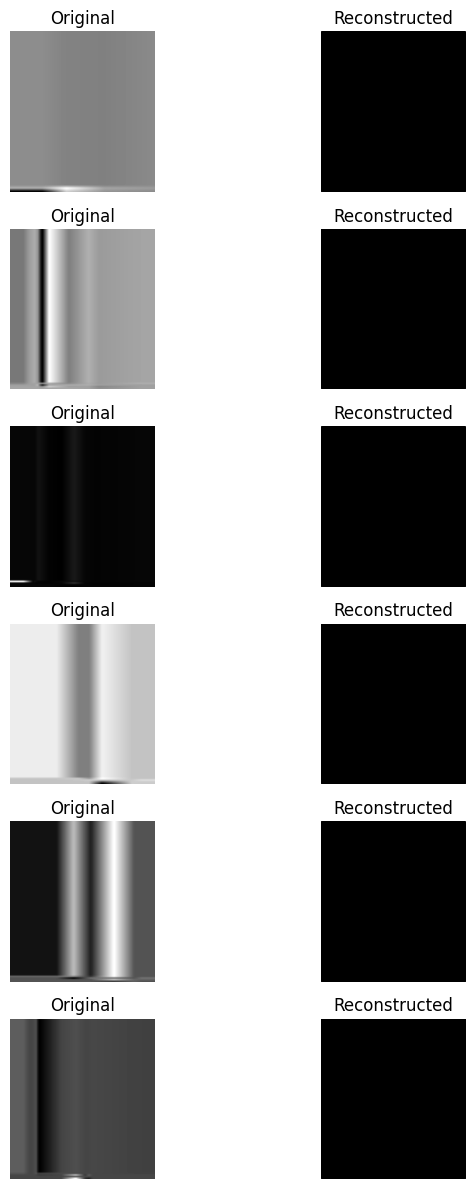

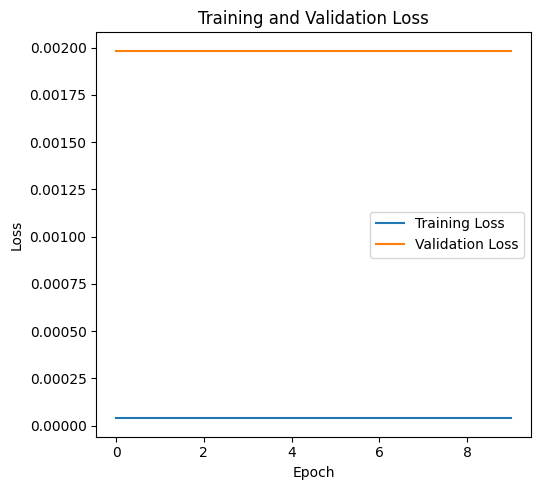

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from sklearn.metrics import mean_squared_error

def evaluate_autoencoder(model, input_image_paths, num_epochs=10, batch_size=32):
    try:
        images = load_and_preprocess_images(input_image_paths)
        if len(images) == 0:
            print("No images loaded successfully. Exiting.")
            return

        history = model.fit(images, images, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

        reconstructed_images = model.predict(images)

        psnr_scores = []
        ssim_scores = []
        mse_scores = []

        for original, reconstructed in zip(images, reconstructed_images):
            psnr = peak_signal_noise_ratio(original, reconstructed)
            ssim = structural_similarity(original.squeeze(), reconstructed.squeeze())
            mse = mean_squared_error(original.flatten(), reconstructed.flatten())

            psnr_scores.append(psnr)
            ssim_scores.append(ssim)
            mse_scores.append(mse)

        avg_psnr = np.mean(psnr_scores)
        avg_ssim = np.mean(ssim_scores)
        avg_mse = np.mean(mse_scores)

        print(f'Average PSNR: {avg_psnr:.2f}')
        print(f'Average SSIM: {avg_ssim:.4f}')
        print(f'Average MSE: {avg_mse:.4f}')

        # Visualize reconstructed images
        visualize_images(images, reconstructed_images)

        # Plot training progress
        plot_training_progress(history)

    except Exception as e:
        print(f"Error: {e}")

def visualize_images(original_images, reconstructed_images):
    num_images = len(original_images)

    fig, axes = plt.subplots(nrows=num_images, ncols=2, figsize=(8, 2*num_images))

    for i in range(num_images):
        axes[i, 0].imshow(original_images[i], cmap='gray')
        axes[i, 0].set_title('Original')

        axes[i, 1].imshow(reconstructed_images[i], cmap='gray')
        axes[i, 1].set_title('Reconstructed')

    for ax in axes.flat:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

def plot_training_progress(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming you have `images` and `reconstructed_images` arrays containing the original and reconstructed images respectively
# images and reconstructed_images should be numpy arrays with shape (num_images, height, width, channels) or (num_images, height, width) for grayscale images

# Example usage:
# Assuming `images` and `reconstructed_images` are numpy arrays containing the original and reconstructed images respectively
evaluate_autoencoder(autoencoder, input_image_paths, num_epochs=10, batch_size=32)


## Saving Model

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def save_model_to_drive(model, model_name):
    # Save the model to Google Drive
    model.save(f'/content/drive/My Drive/{model_name}.h5')
    print(f"Model '{model_name}' saved to Google Drive.")

# Example usage:
# Assuming `autoencoder` is your trained model
save_model_to_drive(autoencoder, 'Agriculture_Multispectral2_model')


Mounted at /content/drive
Model 'Agriculture_Multispectral2_model' saved to Google Drive.


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# If you plan to continue training your autoencoder model in the future, you can load the saved model using
# tf.keras.models.load_model("Agriculture_Multispectral_model.h5")

## Testing phase

Test image loaded successfully.
Image shape: (101, 91)


1/1 [==============================] - 0s 358ms/step


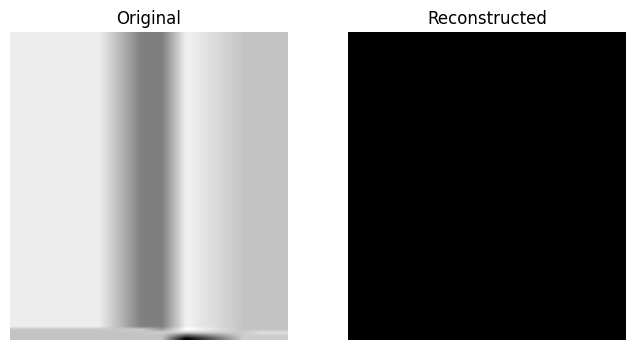

1/1 [==============================] - 0s 469ms/step - loss: 2.9616
Evaluation Loss: 2.9616312980651855


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tifffile
import cv2

# Load the saved model
autoencoder = tf.keras.models.load_model("/content/drive/MyDrive/Agriculture_Multispectral2_model.h5")

# Load the test image
test_image_path = "/content/raster_output4.tif"
test_image = tifffile.imread(test_image_path)

if test_image is None:
    print("Error: Failed to load the test image.")
else:
    print("Test image loaded successfully.")
    print("Image shape:", test_image.shape)

    # Convert to grayscale if necessary (assuming it's a multi-channel image)
    if test_image.ndim == 3:
        test_image_gray = np.mean(test_image, axis=-1)
    else:
        test_image_gray = test_image

    # Resize the test image if necessary
    test_image_resized = cv2.resize(test_image_gray, (364, 404))[..., np.newaxis]

    # Perform inference
    reconstructed_image_gray = autoencoder.predict(test_image_resized[np.newaxis, ...])

    # Create a three-channel image by duplicating the grayscale channel
    reconstructed_image = np.concatenate([reconstructed_image_gray]*3, axis=-1)

    # Save the reconstructed image
    reconstructed_image_path = "/content/reconstructed_image.tif"
    tifffile.imwrite(reconstructed_image_path, reconstructed_image.squeeze())

    # Visualize the original and reconstructed images
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(test_image_resized.squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image.squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
    plt.show()

    # Compute evaluation loss
    evaluation_loss = autoencoder.evaluate(test_image_resized[np.newaxis, ...], test_image_resized[np.newaxis, ...])
    print("Evaluation Loss:", evaluation_loss)


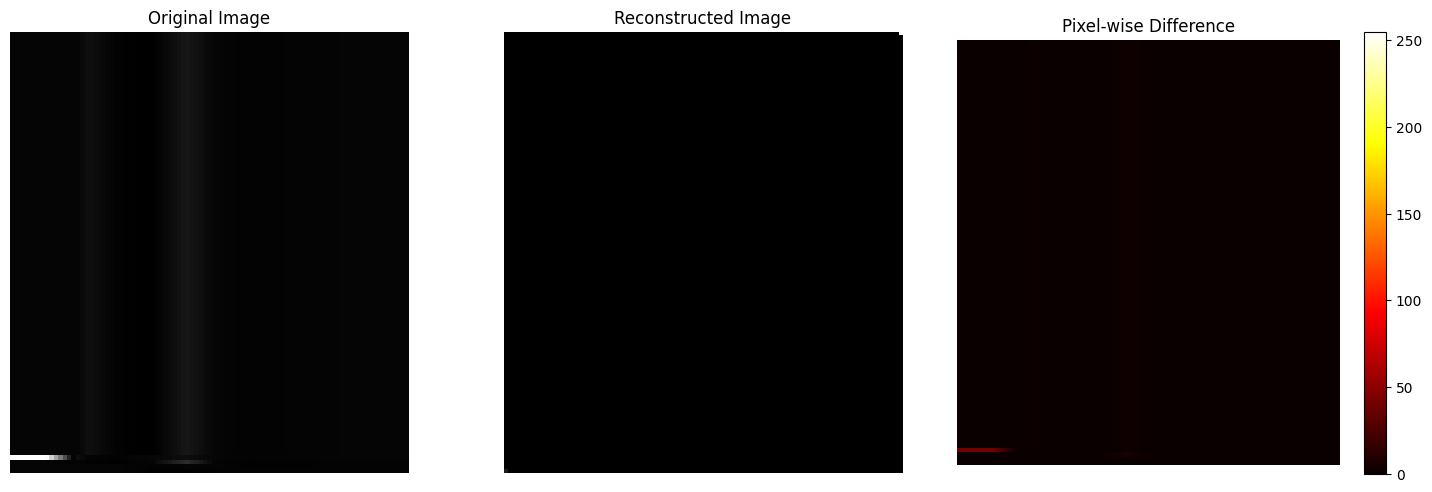

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tifffile

# Load the original and reconstructed images
original_image_path = "/content/raster_output3.tif"
reconstructed_image_path = "/content/reconstructed_image.tif"

original_image = tifffile.imread(original_image_path)
reconstructed_image = tifffile.imread(reconstructed_image_path)

# Convert to grayscale if necessary (assuming it's a multi-channel image)
if original_image.ndim == 3:
    original_image = np.mean(original_image, axis=-1)
if reconstructed_image.ndim == 3:
    reconstructed_image = np.mean(reconstructed_image, axis=-1)

# Resize the reconstructed image to match the size of the original image
reconstructed_image_resized = cv2.resize(reconstructed_image, (original_image.shape[1], original_image.shape[0]))

# Compute pixel-wise absolute difference between original and reconstructed images
pixel_diff = np.abs(original_image.astype(np.float32) - reconstructed_image_resized.astype(np.float32))

# Visualize the original and reconstructed images along with the pixel-wise difference
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Reconstructed image
plt.subplot(1, 3, 2)
plt.imshow(reconstructed_image_resized, cmap='gray')
plt.title("Reconstructed Image")
plt.axis("off")

# Pixel-wise difference
plt.subplot(1, 3, 3)
plt.imshow(pixel_diff, cmap='hot', vmin=0, vmax=255)  # Use 'hot' colormap to emphasize differences
plt.title("Pixel-wise Difference")
plt.colorbar()
plt.axis("off")

plt.tight_layout()
plt.show()


## Final Result After Classification:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


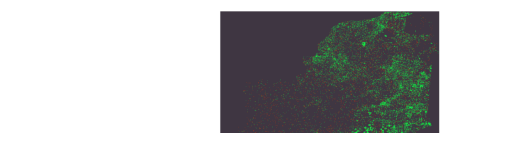

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the TIFF file
file_path = '/content/drive/MyDrive/Final Classification.tif'

# Open the image
image = Image.open(file_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()
